In [1]:
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import numpy as np
import geek

import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



In [201]:

a=stats.chi2.cdf(2 , 2)
b=stats.chi2.cdf(4 , 2)
c=b-a
print(a)
print(b)
print(c)

0.6321205588285577
0.8646647167633873
0.23254415793482963


In [202]:
# Данные задачи
observed = [10, 10, 10, 5, 10, 15]
expected = [10, 10, 10, 10, 10, 10]

# Расчет статистики Хи-квадрат и p-уровня значимости
chi2_stat, p_value = stats.chisquare(observed, expected)
chi2_stat, p_value


(5.0, 0.4158801869955079)

In [203]:
observed = [10, 30, 50]
expected = [30, 30, 30]

# Расчет статистики Хи-квадрат и p-уровня значимости
chi2_stat, p_value = stats.chisquare(observed, expected)
chi2_stat, p_value

(26.666666666666668, 1.61959679231261e-06)

In [204]:


observed = [795, 705]
expected = [750, 750]

# Расчет статистики Хи-квадрат и p-уровня значимости
chi2_stat, p_value = stats.chisquare(observed, expected)
chi2_stat, p_value

(5.4, 0.02013675155034633)

In [205]:
observed = ([10, 6], [5, 15])
chi2_contingency (observed)

Chi2ContingencyResult(statistic=3.715714285714286, pvalue=0.053902557169387154, dof=1, expected_freq=array([[ 6.66666667,  9.33333333],
       [ 8.33333333, 11.66666667]]))

In [206]:
chi2, p_value, dof, ev = stats.chi2_contingency(([20,15],[11,12],[7,9]))
print(f'''
Хи квадрат {chi2}
p - value {p_value}
Степеней свобод {dof}
Ожидаемые наблюдения
{ev}
''')


Хи квадрат 0.9544070774762996
p - value 0.6205162173513055
Степеней свобод 2
Ожидаемые наблюдения
[[17.97297297 17.02702703]
 [11.81081081 11.18918919]
 [ 8.21621622  7.78378378]]



In [207]:
chi2, p_value, dof, ev = stats.chi2_contingency(([18,7],[6,13]))
print(f'''
Хи квадрат {chi2}
p - value {p_value}
Степеней свобод {dof}
Ожидаемые наблюдения
{ev}
''')


Хи квадрат 5.57719298245614
p - value 0.018195864430772903
Степеней свобод 1
Ожидаемые наблюдения
[[13.63636364 11.36363636]
 [10.36363636  8.63636364]]



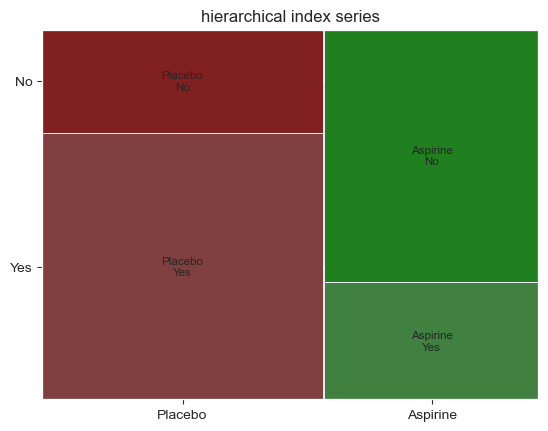

In [208]:


tuples = list(product(['Placebo', 'Aspirine'], ['Yes', 'No']))
index = pd.MultiIndex.from_tuples(tuples)
data = pd.Series([18,7,6,13], index=index)
mosaic(data, title='hierarchical index series')
plt.show()

In [209]:


# Загрузка данных
df = pd.read_csv('train.csv')

# Анализ данных
print(df.Survived.value_counts())
print(np.log(342 / 549))

# Моделирование с statsmodels
glm_binom2 = smf.glm(formula="Survived ~ C(Sex)",
                     data=df, family=sm.families.Binomial())
model = glm_binom2.fit()
print(model.summary())

# Расчеты
print(np.exp(-0.4732877044469254) / (1 + np.exp(-0.4732877044469254)))
print(pd.crosstab(df.Survived, df.Sex))

log_odds_male = np.log(109 / 468)
log_odds_female = np.log(233 / 81) # intercept
print(log_odds_male, log_odds_female)

odds_male = 109 / 468
odds_female = 233 / 81
odds_ratio = np.log(odds_male / odds_female) # coef_
odds_ratio1 = np.exp (np.log(odds_male / odds_female))
print(odds_ratio)
#print(odds_ratio1)

# Моделирование с sklearn
y = df.Survived
X = pd.get_dummies(df.Sex, drop_first=True)
model = LogisticRegression()
model.fit(X, y)

# Получение коэффициентов
intercept = model.intercept_.item()
coef = model.coef_.item()

pd.DataFrame(data=[intercept, coef],
             index=['intercept', 'coef'], columns=['coefs'])


Survived
0    549
1    342
Name: count, dtype: int64
-0.4732877044469254
                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      889
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.90
Date:                Thu, 18 Jul 2024   Deviance:                       917.80
Time:                        17:55:43   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2605
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------

coefs
intercept  1.016288
coef      -2.445980

In [210]:
p = math.exp(1.1243)
p1 =math.exp(-2.4778)
cd = -1.35+ (2.477*0)
p11 =math.exp(cd)
print(p11)

print(p)
print(p1)
p2 = p1 + p
print(p2)
x22 = p11 / (1 + p11)
x23 = p  /( p + 1)
print(x23)
print(x22)
print (1/(x22 / x23))

0.2592402606458915
3.078061451600862
0.08392766349580283
3.161989115096665
0.7547854509138294
0.20587037180094733
3.666314119467463


Optimization terminated successfully.
         Current function value: 0.447866
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Thu, 18 Jul 2024   Pseudo R-squ.:                  0.3274
Time:                        17:55:44   Log-Likelihood:                -399.05
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.670e-82
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.4122      0.587      5.815      0.000       2.262       4.562
C(Sex)[T.1]                   -3.9494      0.616     -6.411      0.000      -5.157      -2.742
C(Pclass)[T.2]                -0.9555      0.725     -1.318      0.187      -2.376       0.465
C(Pclass)[T.3]                -3.4122      0.610     -5.594      0.000      -4.608      -2.217
C(Sex)[T.1]:C(Pclass)[T.2]    -0.1850      0.794     -0.233      0.816      -1.741       1.371
C(Sex)[T.1]:C(Pclass)[T.3]     2.0958      0.657      3.189      0.001       0.808       3.384
==============================================================================================
"""

TypeError: tuple indices must be integers or slices, not str

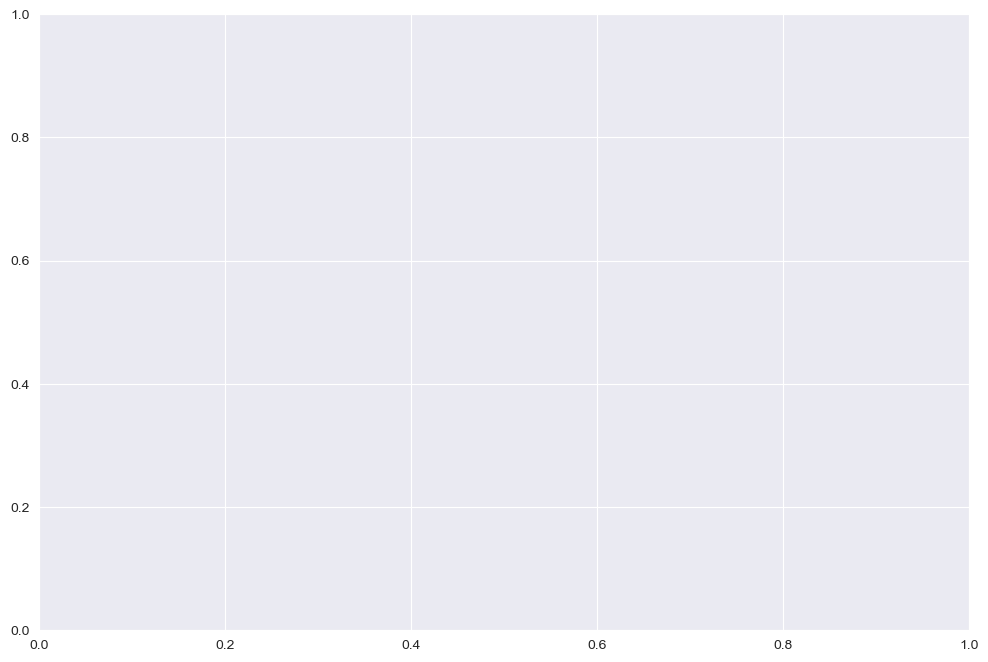

In [211]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('train.csv')

dataset["Sex"] = dataset["Sex"].replace("male", 1).replace("female", 0)
x = dataset[["Sex", "Pclass"]].values
y = dataset["Survived"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)
model = LogisticRegression(n_jobs=1).fit(x_train, y_train)
y_predict = model.predict(x_test)
score = model.score(x_test, y_test)

mode = smf.logit(formula="Survived ~ C(Sex)*C(Pclass)", data=dataset).fit()
display(mode.summary())
plt.rcParams["figure.figsize"]=(12,8)
mosaic(data, ["Survived", "Sex", "Pclass"], gap=0.02, title="Titanic Survived")
plt.show()

In [212]:
vibe = math.exp(-1.15 + 0.80 + 2.13 + (-0.17)) / (1 + math.exp(-1.15 + 0.80 + 2.13 + (-0.17)))
print(vibe)


vibe1 = math.exp(3.3)
print(vibe1)

0.8334113864245404
27.112638920657883


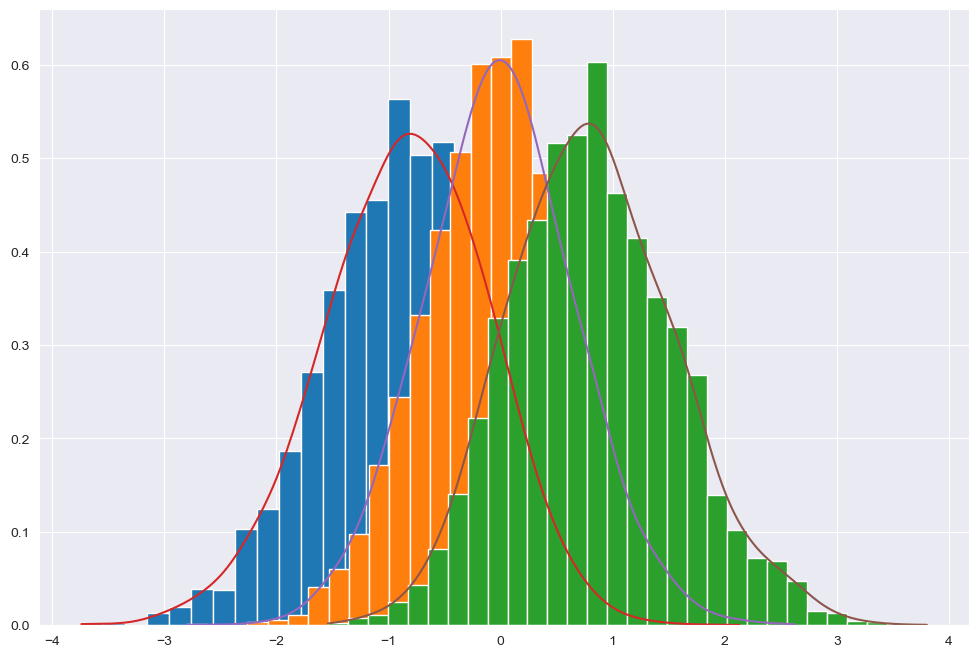

In [213]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt



def get_gaussian_density(dataset):
    ''' Гауссово распределение, полученное на основе выборки

        :param dataset: массив значений
    '''

    density = ss.gaussian_kde(dataset)
    density.covariance_factor = lambda : 0.25
    density._compute_covariance()

    min_x, max_x = np.percentile(dataset, [0, 100])

    return np.linspace(min_x, max_x, 200), density




mu, sigma = 0, 1 # Среднее и стандартное отклонение
rnd = np.random.normal(mu, sigma, 10000)  # Выборка случайно распределенной величины


# Случайно выбираем по 3 пробы, сортируем их
random_samples = (
  sorted(np.random.choice(rnd, 3))
  for i in range(10000)
)

# Zip функция - без комментариев (функциональное программирование, есть на Вики)
# на выходе получаем массивы минимальных, средних и максимальных значений
rnd1, rnd2, rnd3 = zip(*random_samples)


# Гистограмма частот распределения случайной величины (опционально)
counts_1, x_range_1, ignored = plt.hist(rnd1, 30, density=True, histtype='barstacked')
counts_2, x_range_2, ignored = plt.hist(rnd2, 30, density=True, histtype='barstacked')
counts_3, x_range_3, ignored = plt.hist(rnd3, 30, density=True, histtype='barstacked')


# Гауссова оценка плотности ядра (приближение к гладкой функции)
x1, linear_1 = get_gaussian_density(rnd1)
x2, linear_2 = get_gaussian_density(rnd2)
x3, linear_3 = get_gaussian_density(rnd3)


plt.plot(x1, linear_1(x1))
plt.plot(x2, linear_2(x2))
plt.plot(x3, linear_3(x3))


plt.show()

In [214]:
# Питонистам важно понимать как каждый из рассматриваемых методов реализуется на Питоне

from sklearn.cluster import KMeans
import numpy as np

# Запишем координаты точек в виде массива numpy
X = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])
# Обучим модель KMeans на нашем массиве с одним кластером
kmeans = KMeans(n_clusters=1).fit(X)
# Выведем координаты центроида данного кластера
print(kmeans.cluster_centers_)
# Выведем сумму квадратов расстояний точек от центроида = аттрибут модели kmeans
print(kmeans.inertia_)

[[3. 5.]]
146.0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


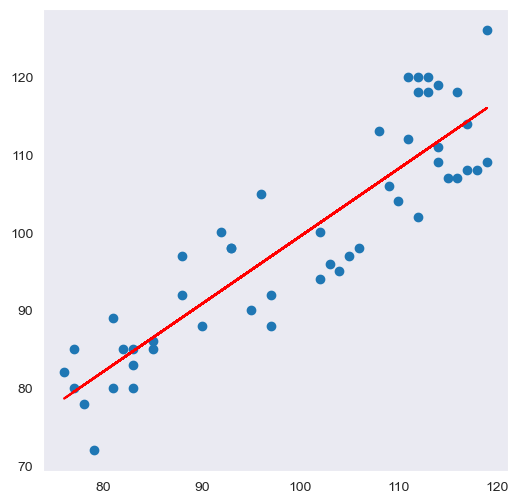

In [215]:
import numpy as np
import matplotlib.pyplot as plt

# генерируем линейную зависимость оценок
R = np.random.randint(75,120,50)
stat = [elem + np.random.randint(-10,10) for elem in R]
X = np.column_stack((R, stat))

x = X[:,0]
y = X[:,1]

# рисуем диаграмму рассеивания
plt.figure(figsize=(6, 6))
plt.scatter(x, y)

# добавляем регрессионную прямую
b1, b0 = np.polyfit(x, y, 1) #  b0 - intercept, b1 - slope
plt.plot(x, b0 + b1*x, color='red')
plt.grid()
plt.show()

In [216]:


import pandas as pd
import numpy as np
def nan_position (x,y):
    if len(x) == len(y):
        df = pd.DataFrame({'x': x, 'y': y})
        for index, row in df.iterrows():
            if isinstance(row['x'], type(row['y'])):
                continue
            elif np.isnan(row['x']) and np.isnan(row['y']):
                continue
            else:
                return False
                break
        else:
            return True
    else:
        return False

In [217]:
def smart_test(data):
  data.columns = [1, 2]
  table = data.pivot_table(index=1, columns=2, aggfunc=lambda x: len(x)).to_numpy()
  if all((table>=5).reshape(-1)):
    chi2_value, p_value, df, expected_array = stats.chi2_contingency(table, correction=True)
    return [chi2_value, df, p_value]
  else:
    odds_ratio, p_value = stats.fisher_exact(table)
    return [p_value]

In [218]:
import numpy as np

premium = 1

motivation1 = 120 * np.log(premium) + 3

motivation2 = 120 * np.log(premium*1.1) + 3

print(round(motivation2 - motivation1))



11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               normexam   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     2185.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:56:04   Log-Likelihood:                -4880.3
No. Observations:                4059   AIC:                             9765.
Df Residuals:                    4057   BIC:                             9777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0012      0.013     -0.094      0.925      -0.026       0.024
standLRT       0.5951      0.013     46.744      0.000       0.570       0.620
==============================================================================
Omnibus:                        2.846   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.856
Skew:                          -0.039   Prob(JB):                        0.240
Kurtosis:                       3.104   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

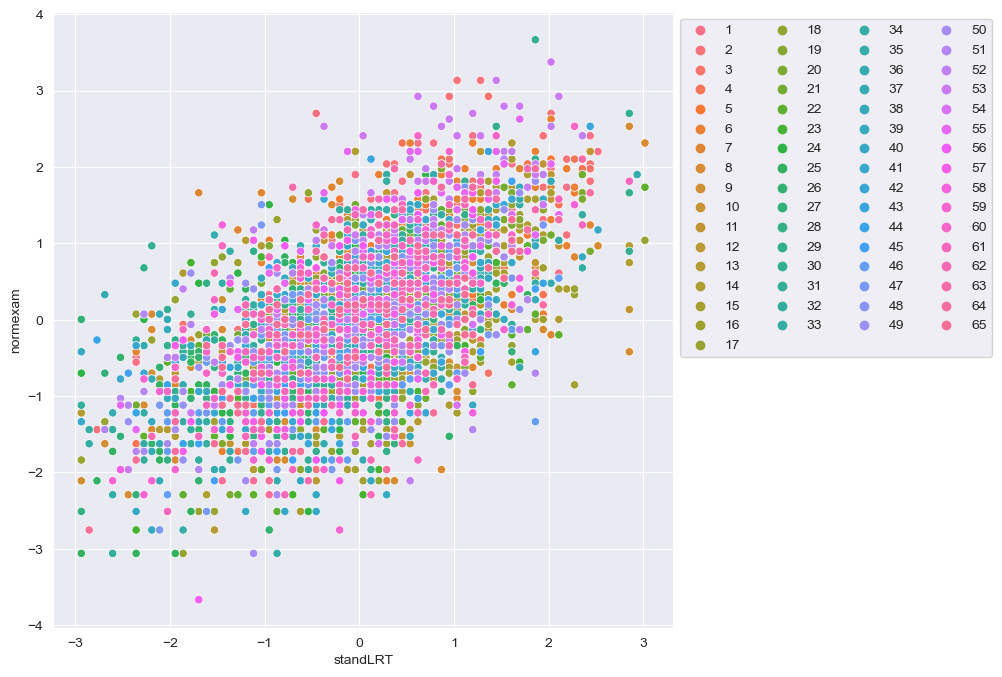

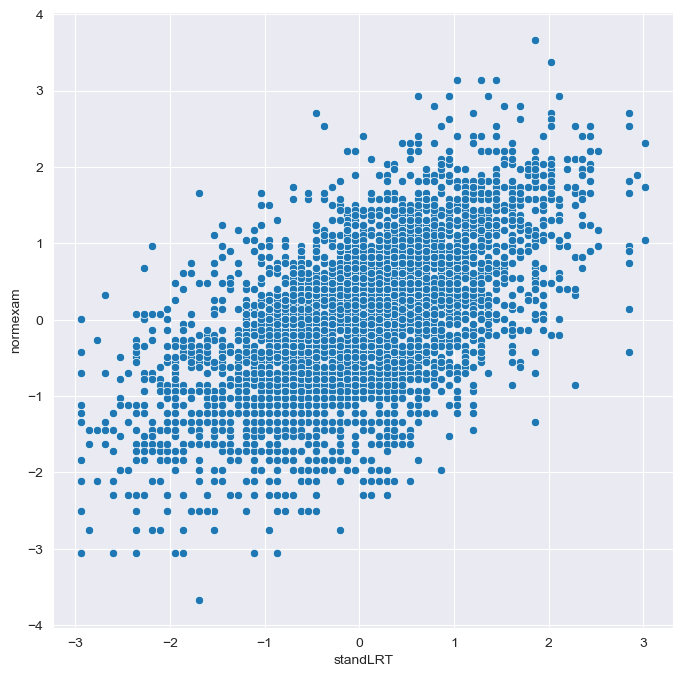

In [219]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# грузим датасет
url = 'https://raw.githubusercontent.com/razority/R_data/main/Exam.xlsx'
exam = pd.read_excel(url)
exam['school'] = exam['school'].map(lambda x: str(x))

# рисуем диаграмму рассеяния
fig, ax = plt.subplots(figsize=(8,8))
g = sns.scatterplot(x='standLRT', y='normexam', hue='school', data=exam)
# немного надо трансформировать легенду
h,l = g.get_legend_handles_labels()
g.legend(h,l, ncol=4, bbox_to_anchor=(1, 1), loc=2)

# исследуем модель
model = smf.ols('normexam ~ standLRT', data=exam).fit()
display(model.summary())

# линейная регрессия
plt.figure(figsize=(8,8))
x = np.array(exam.loc[:,'standLRT'])
y = np.array(exam.loc[:,'normexam'])

sns.scatterplot(x='standLRT', y='normexam', data=exam)
b1, b0 = np.polyfit(x, y, 1) #  b0 - intercept, b1 - slope
sns.lineplot(x, b0 + b1*x, color='red')
plt.grid()

In [ ]:
x = 'hello gleb'
y = [i for i in [1,2,3] if i > 1]
print(x)
print(y)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
StudentsPerformance = pd.read_csv('/Users/glebpankeev/Downloads/StudentsPerformance.csv', sep=',')

In [ ]:
StudentsPerformance.head(
)

In [ ]:
StudentsPerformance.describe()

In [ ]:
StudentsPerformance.dtypes

In [ ]:
StudentsPerformance.shape

In [ ]:
StudentsPerformance.groupby('gender').aggregate({'writing score': 'mean'})

In [ ]:
StudentsPerformance.head(
)

In [ ]:
StudentsPerformance.iloc[0:3, 0:5]

In [ ]:
StudentsPerformance.iloc[[0,5,10], [-1,-2,-3]]

In [ ]:
StudentsPerformance_with_names = StudentsPerformance.iloc[[0,3,4,7,8]]
StudentsPerformance_with_names.index = ["Cersei", "Tywin", "Gregor", "Joffrey", "Ilyn Payne"]

In [ ]:
StudentsPerformance_with_names

In [ ]:
print(StudentsPerformance_with_names.loc [["Cersei", "Tywin"], ['gender', 'writing score']])
type(StudentsPerformance_with_names.loc)

In [ ]:
print(StudentsPerformance_with_names.iloc [:, 1])
type(StudentsPerformance_with_names.iloc [:, 1])

In [ ]:
myseries1 = pd.Series([0,1,3,4,5], index = ["Cersei", "Tywin", "Gregor", "Joffrey", "Ilyn Payne"])
myseries2 = pd.Series([2,4,6,8,10], index = ["Cersei", "Tywin", "Gregor", "Joffrey", "Ilyn Payne"])

In [ ]:
pd.DataFrame({'col1':myseries1, 'col2': myseries2})

In [220]:
fr = StudentsPerformance_with_names['gender'].shape
print(type(fr))
fr

NameError: name 'StudentsPerformance_with_names' is not defined

In [221]:
fr = StudentsPerformance_with_names[['gender']].shape
fr

NameError: name 'StudentsPerformance_with_names' is not defined

In [222]:
StudentsPerformance.iloc[0:7]

NameError: name 'StudentsPerformance' is not defined

In [223]:
StudentsPerformance.loc[:6]

NameError: name 'StudentsPerformance' is not defined

In [224]:
StudentsPerformance.head(7)

NameError: name 'StudentsPerformance' is not defined

In [225]:
StudentsPerformance.size
type(StudentsPerformance.size)

NameError: name 'StudentsPerformance' is not defined

In [226]:
StudentsPerformance.dtypes
type(StudentsPerformance.dtypes)

NameError: name 'StudentsPerformance' is not defined

In [227]:
StudentsPerformance.select_dtypes(include=int, exclude=object)
type(StudentsPerformance.select_dtypes(include=int, exclude=object))

NameError: name 'StudentsPerformance' is not defined

In [228]:
print(StudentsPerformance.index)
type(StudentsPerformance.index)

NameError: name 'StudentsPerformance' is not defined

In [229]:
StudentsPerformance.columns
type(StudentsPerformance.columns)

NameError: name 'StudentsPerformance' is not defined

In [230]:
StudentsPerformance.shape

NameError: name 'StudentsPerformance' is not defined

In [231]:
titanic = pd.read_csv('/Users/glebpankeev/Downloads/titanic.csv')

titanic.select_dtypes(include=object)


Name     Sex  \
0                                Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female   
2                                 Heikkinen, Miss. Laina  female   
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                               Allen, Mr. William Henry    male   
..                                                   ...     ...   
886                                Montvila, Rev. Juozas    male   
887                         Graham, Miss. Margaret Edith  female   
888             Johnston, Miss. Catherine Helen "Carrie"  female   
889                                Behr, Mr. Karl Howell    male   
890                                  Dooley, Mr. Patrick    male   

               Ticket Cabin Embarked  
0           A/5 21171   NaN        S  
1            PC 17599   C85        C  
2    STON/O2. 3101282   NaN        S  
3              113803  C123        S  
4              373450   NaN        S  
..                ...   ...      ...  
886            211536   NaN        S  
887            112053   B42        S  
888        W./C. 6607   NaN        S  
889            111369  C148        C  
890            370376   NaN        Q  

[891 rows x 5 columns]

In [232]:
StudentsPerformance.loc [StudentsPerformance.gender == 'female', ['gender', 'writing score']]

NameError: name 'StudentsPerformance' is not defined

In [233]:
StudentsPerformance = pd.read_csv('/Users/glebpankeev/Downloads/StudentsPerformance.csv', sep=',')
StudentsPerformance


gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

In [234]:

query1 = (StudentsPerformance.lunch == 'standard')
query2 = (StudentsPerformance.lunch == 'free/reduced')


q1 = StudentsPerformance.loc[query1]
# d1 = q1.var()
#
# print(d1)
#q1.describe()
print(q1.describe())

q2 = StudentsPerformance.loc[query2]
print(q2.describe())


       math score  reading score  writing score
count  645.000000     645.000000     645.000000
mean    70.034109      71.654264      70.823256
std     13.653501      13.830602      14.339487
min     19.000000      26.000000      22.000000
25%     61.000000      63.000000      62.000000
50%     69.000000      72.000000      72.000000
75%     80.000000      82.000000      81.000000
max    100.000000     100.000000     100.000000
       math score  reading score  writing score
count  355.000000     355.000000     355.000000
mean    58.921127      64.653521      63.022535
std     15.159956      14.895339      15.433823
min      0.000000      17.000000      10.000000
25%     49.000000      56.000000      53.000000
50%     60.000000      65.000000      64.000000
75%     69.000000      75.000000      74.000000
max    100.000000     100.000000     100.000000


In [235]:
StudentsPerformance.rename(columns=
                                            {'parental level of education': 'parental_level_of_education',
                                            'test preparation course': 'test_preparation_course',
                                            'math score': 'math_score',
                                            'reading score': 'reading_score',
                                            'writing score': 'writing_score'})

gender race/ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

In [236]:
StudentsPerformance.query('lunch == "standard"')

gender race/ethnicity parental level of education     lunch  \
0    female        group B           bachelor's degree  standard   
1    female        group C                some college  standard   
2    female        group B             master's degree  standard   
4      male        group C                some college  standard   
5    female        group B          associate's degree  standard   
..      ...            ...                         ...       ...   
987    male        group E            some high school  standard   
991  female        group B            some high school  standard   
994    male        group A                 high school  standard   
995  female        group E             master's degree  standard   
998  female        group D                some college  standard   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
4                      none          76             78             75  
5                      none          71             83             78  
..                      ...         ...            ...            ...  
987               completed          81             75             76  
991               completed          65             82             78  
994                    none          63             63             62  
995               completed          88             99             95  
998               completed          68             78             77  

[645 rows x 8 columns]

In [237]:

student_stats = pd.read_csv('/Users/glebpankeev/Downloads/StudentsPerformance.csv')

student_stats[student_stats['parental level of education'].isin(["bachelor's degree", "master's degree"])]



gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
2    female        group B             master's degree      standard   
14   female        group A             master's degree      standard   
18     male        group C             master's degree  free/reduced   
24     male        group D           bachelor's degree  free/reduced   
..      ...            ...                         ...           ...   
957  female        group D             master's degree      standard   
969  female        group B           bachelor's degree      standard   
970  female        group D           bachelor's degree      standard   
993  female        group D           bachelor's degree  free/reduced   
995  female        group E             master's degree      standard   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
2                      none          90             95             93  
14                     none          50             53             58  
18                completed          46             42             46  
24                completed          74             71             80  
..                      ...         ...            ...            ...  
957                    none          92            100            100  
969                    none          75             84             80  
970                    none          89            100            100  
993                    none          62             72             74  
995               completed          88             99             95  

[177 rows x 8 columns]

In [238]:
list(StudentsPerformance)

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [239]:
StudentsPerformance[['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']]

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

In [240]:
StudentsPerformance.filter(like = 'score')

math score  reading score  writing score
0            72             72             74
1            69             90             88
2            90             95             93
3            47             57             44
4            76             78             75
..          ...            ...            ...
995          88             99             95
996          62             55             55
997          59             71             65
998          68             78             77
999          77             86             86

[1000 rows x 3 columns]

In [241]:
StudentsPerformance_with_names.filter(like = 'C', axis=0)

NameError: name 'StudentsPerformance_with_names' is not defined

In [242]:


student_stats = pd.read_csv('/Users/glebpankeev/Downloads/StudentsPerformance.csv')
student_stats.groupby('gender')[['math score', 'reading score', 'writing score']].agg([np.mean])


student_stats.sort_values(['gender', 'math score'])

/var/folders/kd/15grz0v55ds97f9bw7zry13c0000gn/T/ipykernel_33153/3228035139.py:2: FutureWarning: The provided callable <function mean at 0x106020c20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  student_stats.groupby('gender')[['math score', 'reading score', 'writing score']].agg([np.mean])
/var/folders/kd/15grz0v55ds97f9bw7zry13c0000gn/T/ipykernel_33153/3228035139.py:2: FutureWarning: The provided callable <function mean at 0x106020c20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  student_stats.groupby('gender')[['math score', 'reading score', 'writing score']].agg([np.mean])


gender race/ethnicity parental level of education         lunch  \
59   female        group C            some high school  free/reduced   
980  female        group B                 high school  free/reduced   
17   female        group B            some high school  free/reduced   
787  female        group B                some college      standard   
145  female        group C                some college  free/reduced   
..      ...            ...                         ...           ...   
306    male        group E                some college      standard   
149    male        group E          associate's degree  free/reduced   
623    male        group A                some college      standard   
625    male        group D                some college      standard   
916    male        group E           bachelor's degree      standard   

    test preparation course  math score  reading score  writing score  
59                     none           0             17             10  
980                    none           8             24             23  
17                     none          18             32             28  
787                    none          19             38             32  
145                    none          22             39             33  
..                      ...         ...            ...            ...  
306               completed          99             87             81  
149               completed         100            100             93  
623               completed         100             96             86  
625               completed         100             97             99  
916               completed         100            100            100  

[1000 rows x 8 columns]

In [243]:
student_stats.sort_values(['gender', 'math score'], ascending=True).groupby('gender').head(3)

gender race/ethnicity parental level of education         lunch  \
59   female        group C            some high school  free/reduced   
980  female        group B                 high school  free/reduced   
17   female        group B            some high school  free/reduced   
91     male        group C                 high school  free/reduced   
327    male        group A                some college  free/reduced   
76     male        group E            some high school      standard   

    test preparation course  math score  reading score  writing score  
59                     none           0             17             10  
980                    none           8             24             23  
17                     none          18             32             28  
91                     none          27             34             36  
327                    none          28             23             19  
76                     none          30             26             22

In [244]:
student_stats['total_score'] = student_stats['math score'] + student_stats['reading score'] + student_stats['writing score']
student_stats.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  
0          218  
1          247  
2          278  
3          148  
4          229

In [245]:
student_stats = student_stats.assign(total_score_log = np.log(student_stats.total_score))
student_stats

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     total_score  total_score_log  
0            218         5.384495  
1            247         5.509388  
2            278         5.627621  
3            148         4.997212  
4            229         5.433722  
..           ...              ...  
995          282         5.641907  
996          172         5.147494  
997          195         5.273000  
998          223         5.407172  
999          249         5.517453  

[1000 rows x 10 columns]

In [246]:
student_stats.drop(['total_score_log'], axis=1, inplace=True)
student_stats

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     total_score  
0            218  
1            247  
2            278  
3            148  
4            229  
..           ...  
995          282  
996          172  
997          195  
998          223  
999          249  

[1000 rows x 9 columns]

In [247]:
dota_hero_stats = pd.read_csv('/Users/glebpankeev/Downloads/dota_hero_stats.csv')
dt2 = dota_hero_stats.groupby('legs').aggregate({'legs': 'count'})


print(dt2)

      legs
legs      
0       11
2       95
4        7
6        3
8        1


In [248]:
accountancy = pd.read_csv('/Users/glebpankeev/Downloads/accountancy.csv')
accountancy



Unnamed: 0 Executor Type  Salary
0            0     Pupa    D      63
1            1     Pupa    A     158
2            2     Pupa    D     194
3            3     Pupa    E     109
4            4    Loopa    E     184
5            5    Loopa    F     232
6            6    Loopa    B     249
7            7     Pupa    F     195
8            8     Pupa    A     115
9            9     Pupa    E      65
10          10    Loopa    C     145
11          11    Loopa    D     149
12          12    Loopa    B      50
13          13     Pupa    A     217
14          14    Loopa    D     110
15          15     Pupa    F      62
16          16     Pupa    A      55
17          17    Loopa    B     190
18          18    Loopa    E      83
19          19     Pupa    A     234
20          20    Loopa    E     156
21          21    Loopa    E     219
22          22     Pupa    C      55
23          23     Pupa    D     144
24          24     Pupa    C      94
25          25    Loopa    C     175
26          26    Loopa    D      78
27          27    Loopa    C      81
28          28     Pupa    E     197
29          29     Pupa    E     193
30          30     Pupa    E      92
31          31     Pupa    D     185
32          32    Loopa    B     128
33          33     Pupa    F     146
34          34    Loopa    B      69
35          35    Loopa    F     244
36          36    Loopa    E     122
37          37    Loopa    C     222
38          38    Loopa    D     181
39          39     Pupa    A     186
40          40    Loopa    D     172
41          41     Pupa    B      77
42          42    Loopa    E     220
43          43    Loopa    B     185
44          44    Loopa    C     249
45          45    Loopa    D     146
46          46    Loopa    A      58
47          47    Loopa    C      54
48          48     Pupa    F     142
49          49    Loopa    D     128

In [249]:
dt2 = accountancy.groupby(['Executor','Type']).mean().Salary
gg = [dt2.Loopa > dt2.Pupa]

print(gg)

[Type
A    False
B     True
C     True
D    False
E     True
F     True
Name: Salary, dtype: bool]


In [250]:
dota_hero_stats = pd.read_csv('/Users/glebpankeev/Downloads/dota_hero_stats.csv')
print(dota_hero_stats)

     Unnamed: 0 attack_type   id  legs  localized_name  \
0             0       Melee    1     2       Anti-Mage   
1             1       Melee    2     2             Axe   
2             2      Ranged    3     4            Bane   
3             3       Melee    4     2     Bloodseeker   
4             4      Ranged    5     2  Crystal Maiden   
..          ...         ...  ...   ...             ...   
112         112       Melee  114     2     Monkey King   
113         113      Ranged  119     2     Dark Willow   
114         114       Melee  120     2       Pangolier   
115         115      Ranged  121     2      Grimstroke   
116         116       Melee  129     2            Mars   

                             name primary_attr  \
0          npc_dota_hero_antimage          agi   
1               npc_dota_hero_axe          str   
2              npc_dota_hero_bane          int   
3       npc_dota_hero_bloodseeker          agi   
4    npc_dota_hero_crystal_maiden          int   
.. 

In [251]:
dota_hero_stats = pd.read_csv('/Users/glebpankeev/Downloads/dota_hero_stats.csv')
combination_counts = dota_hero_stats .groupby(['attack_type', 'primary_attr']).size().reset_index(name='count')

# Sort by count in descending order
sorted_combinations = combination_counts.sort_values(by='count', ascending=False)
print(
    sorted_combinations
)
# Display the most frequent combination

  attack_type primary_attr  count
4      Ranged          int     40
2       Melee          str     35
0       Melee          agi     19
3      Ranged          agi     18
5      Ranged          str      3
1       Melee          int      2


In [252]:
concentrations = pd.read_csv('/Users/glebpankeev/Downloads/algae.csv')


print(concentrations)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/glebpankeev/Downloads/algae.csv'

In [253]:
concentrations = pd.read_csv('/Users/glebpankeev/Downloads/algae.csv')

mean_concentrations = concentrations.groupby(['group']).aggregate(
    mean_max = ('sucrose', 'max' ),
    mean_min = ('sucrose', 'min' )
)

mean_concentrations['total_score'] = mean_concentrations['mean_max'] - mean_concentrations['mean_min']
print(mean_concentrations)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/glebpankeev/Downloads/algae.csv'

In [254]:
concentrations = pd.read_csv('/Users/glebpankeev/Downloads/algae.csv')

mean_concentrations = concentrations.groupby(['group']).aggregate(
    mean_max = ('citrate', 'var' )

)
print(mean_concentrations)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/glebpankeev/Downloads/algae.csv'

In [255]:
concentrations = pd.read_csv('/Users/glebpankeev/Downloads/algae.csv')

mean_concentrations = concentrations.groupby(['group']).aggregate(
    mean_max = ('species', 'count' )

)
print(mean_concentrations)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/glebpankeev/Downloads/algae.csv'

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
student_stats = pd.read_csv('/Users/glebpankeev/Downloads/StudentsPerformance.csv')

student_stats

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

In [258]:
student_stats = student_stats.rename(columns= {'math score': 'math_score', 'reading score': 'reading_score', 'writing score': 'writing_score'})



<Axes: >

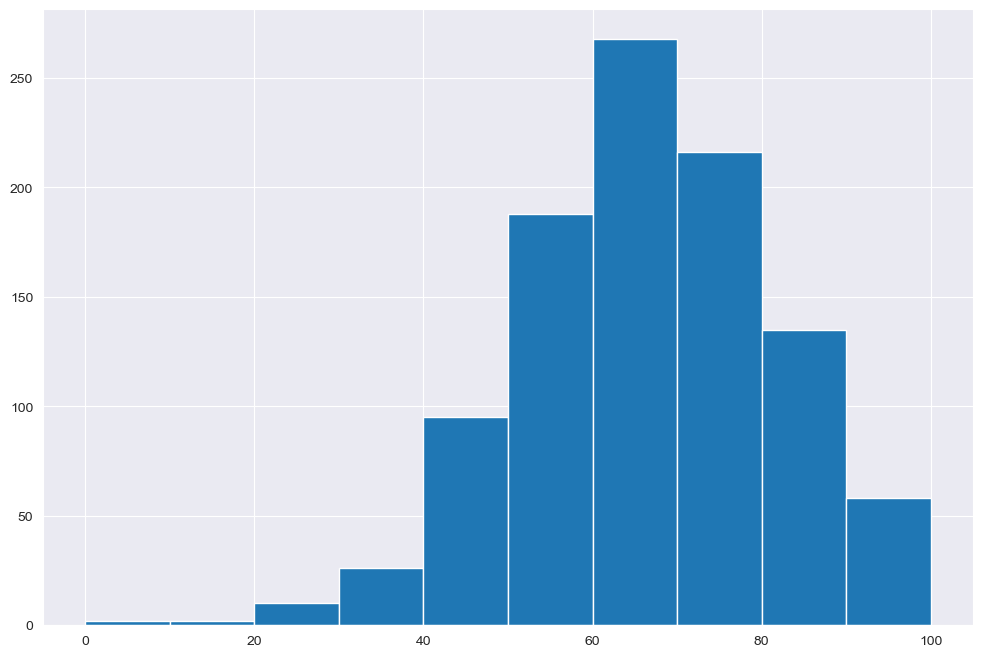

In [259]:
student_stats.math_score.hist()

<Axes: xlabel='math_score', ylabel='reading_score'>

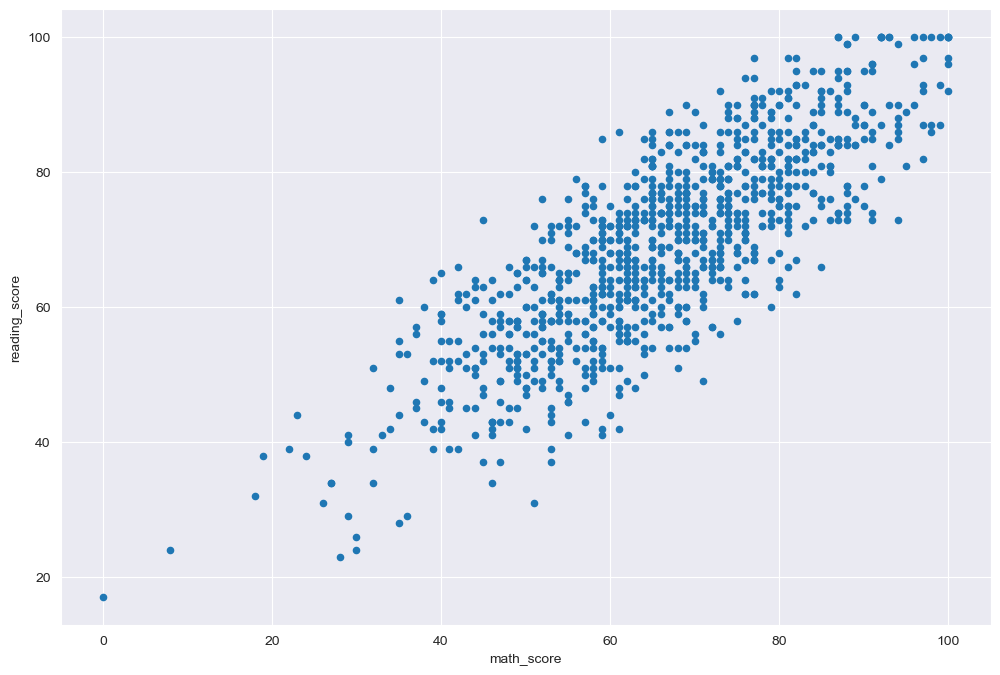

In [260]:
student_stats.plot.scatter (x = 'math_score', y = 'reading_score')

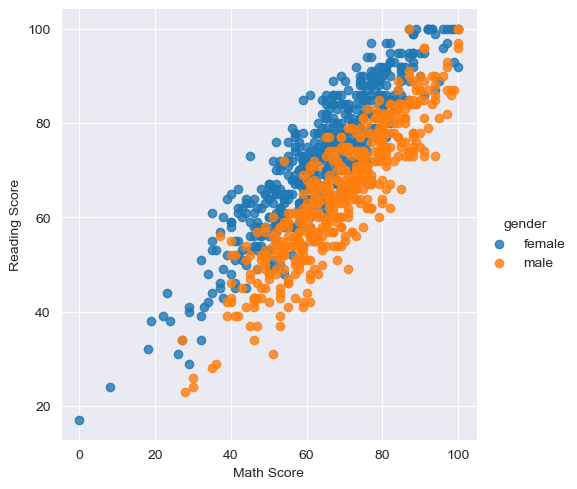

In [261]:
ax = sns.lmplot(x= 'math_score', y = 'reading_score', hue = 'gender', data = student_stats, fit_reg = False)
ax.set_xlabels('Math Score')
ax.set_ylabels('Reading Score')

In [262]:
income = pd.read_csv('/Users/glebpankeev/Downloads/income.csv')

income

FileNotFoundError: [Errno 2] No such file or directory: '/Users/glebpankeev/Downloads/income.csv'

In [263]:
income['income'].plot()

NameError: name 'income' is not defined

In [264]:
income.plot(kind='line')

NameError: name 'income' is not defined

In [265]:
income.plot()

NameError: name 'income' is not defined

In [266]:
plt.plot(income.index, income.income)

NameError: name 'income' is not defined

In [267]:
sns.lineplot(data=income)

NameError: name 'income' is not defined

In [268]:
income.income.plot()

NameError: name 'income' is not defined

In [269]:
sns.lineplot(x=income.index, y=income.income)

NameError: name 'income' is not defined

In [270]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/glebpankeev/Downloads/dataset_209770_6.txt', sep=' ')
df


x            y
0    1297.881123  1312.503934
1    1303.391266  1297.205157
2    1488.320454   718.351021
3     707.696954   489.013398
4     906.816532   313.441157
..           ...          ...
105   914.323854   312.076011
106   714.193000   503.497592
107  1506.767600   697.005898
108   791.425510   404.777382
109   207.084035  1400.741436

[110 rows x 2 columns]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='y'>

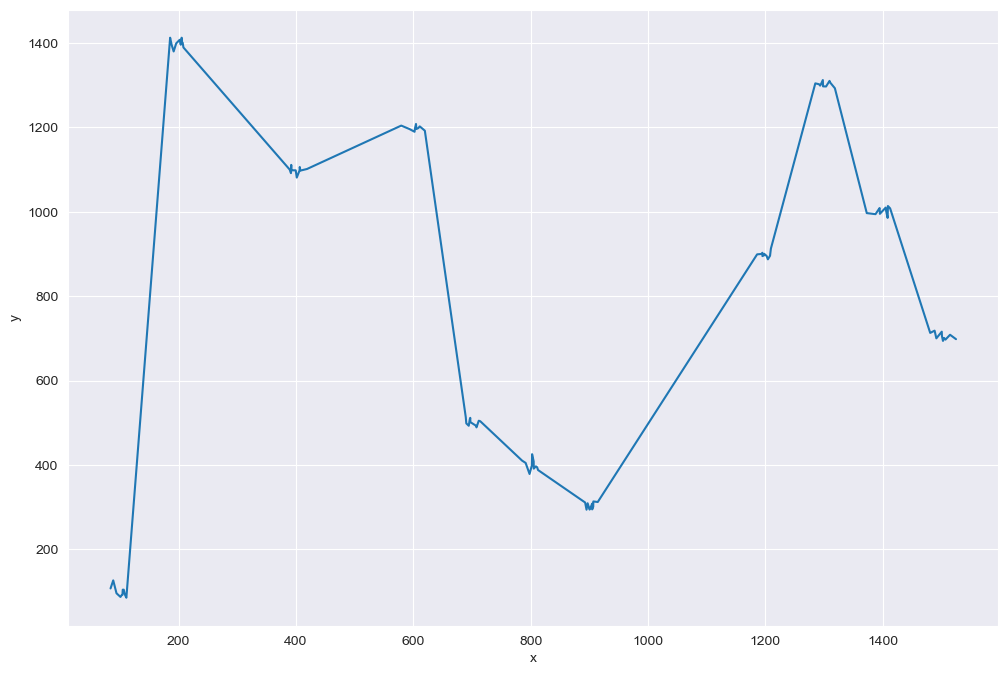

In [271]:
sns.lineplot(x=df.x, y=df.y, )

<Axes: xlabel='x', ylabel='y'>

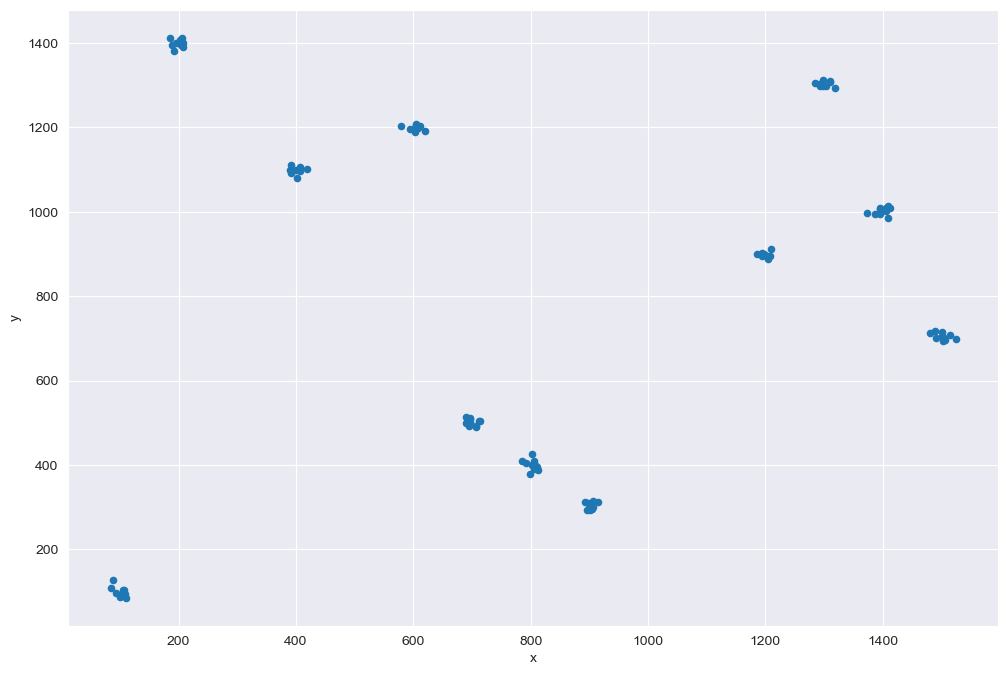

In [272]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/glebpankeev/Downloads/dataset_209770_6.txt', sep=' ')
df.plot.scatter(x = 'x', y = 'y')




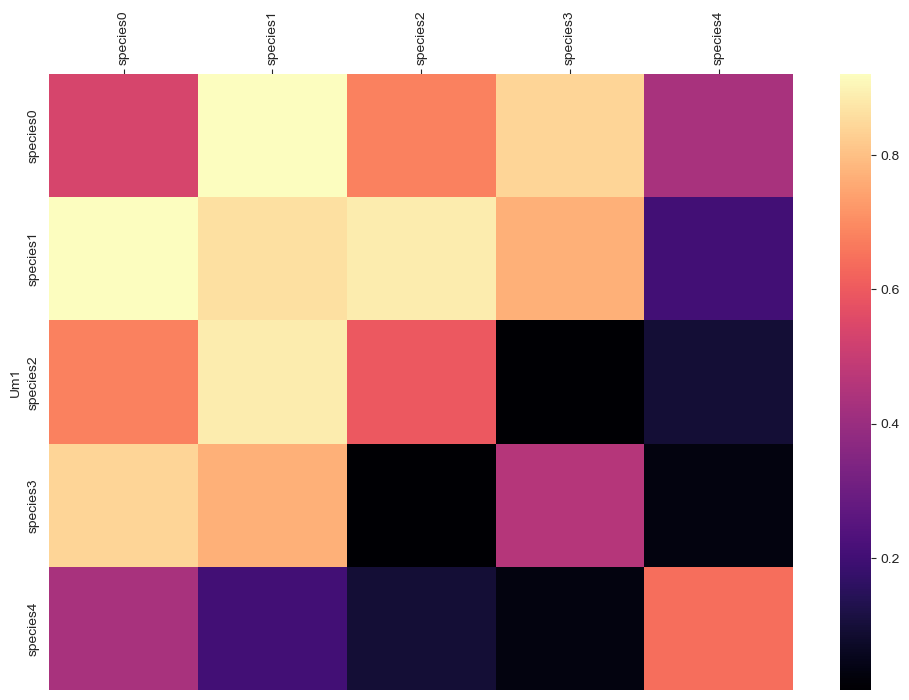

In [273]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/glebpankeev/Downloads/genome_matrix.csv', sep=',')

df = df.rename(columns= {'Unnamed: 0': 'Um1'})

df  = df.set_index(df['Um1'])
df = df.drop(columns= { 'Um1'})
#df  = df.set_index(df['Um'])

g = sns.heatmap(df, cmap="magma")
g.xaxis.set_ticks_position('top')

g.xaxis.set_tick_params(rotation=90)


In [274]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/glebpankeev/Downloads/genome_matrix.csv', sep=',')

df = df.rename(columns= {'Unnamed: 0': 'Um'})

df  = df.set_index(df['Um'])


df


Um  species0  species1  species2  species3  species4
Um                                                                  
species0  species0  0.536029  0.920292  0.679708  0.840606  0.430842
species1  species1  0.920292  0.862417  0.887593  0.769754  0.203214
species2  species2  0.679708  0.887593  0.595156  0.003435  0.096052
species3  species3  0.840606  0.769754  0.003435  0.458870  0.029251
species4  species4  0.430842  0.203214  0.096052  0.029251  0.642109

In [275]:
dota_hero_stats = pd.read_csv('/Users/glebpankeev/Downloads/dota_hero_stats.csv')
dota_hero_stats

Unnamed: 0 attack_type   id  legs  localized_name  \
0             0       Melee    1     2       Anti-Mage   
1             1       Melee    2     2             Axe   
2             2      Ranged    3     4            Bane   
3             3       Melee    4     2     Bloodseeker   
4             4      Ranged    5     2  Crystal Maiden   
..          ...         ...  ...   ...             ...   
112         112       Melee  114     2     Monkey King   
113         113      Ranged  119     2     Dark Willow   
114         114       Melee  120     2       Pangolier   
115         115      Ranged  121     2      Grimstroke   
116         116       Melee  129     2            Mars   

                             name primary_attr  \
0          npc_dota_hero_antimage          agi   
1               npc_dota_hero_axe          str   
2              npc_dota_hero_bane          int   
3       npc_dota_hero_bloodseeker          agi   
4    npc_dota_hero_crystal_maiden          int   
..                            ...          ...   
112     npc_dota_hero_monkey_king          agi   
113     npc_dota_hero_dark_willow          int   
114       npc_dota_hero_pangolier          agi   
115      npc_dota_hero_grimstroke          int   
116            npc_dota_hero_mars          str   

                                                                roles  
0                                        ['Carry', 'Escape', 'Nuker']  
1                     ['Initiator', 'Durable', 'Disabler', 'Jungler']  
2                         ['Support', 'Disabler', 'Nuker', 'Durable']  
3              ['Carry', 'Disabler', 'Jungler', 'Nuker', 'Initiator']  
4                         ['Support', 'Disabler', 'Nuker', 'Jungler']  
..                                                                ...  
112                      ['Carry', 'Escape', 'Disabler', 'Initiator']  
113                        ['Support', 'Nuker', 'Disabler', 'Escape']  
114  ['Carry', 'Nuker', 'Disabler', 'Durable', 'Escape', 'Initiator']  
115                        ['Support', 'Nuker', 'Disabler', 'Escape']  
116                     ['Carry', 'Initiator', 'Disabler', 'Durable']  

[117 rows x 8 columns]

In [276]:
dota_hero_stats.roles.mode()



0    ['Carry', 'Disabler', 'Initiator', 'Durable', 'Nuker']
1                                       ['Carry', 'Escape']
2                          ['Support', 'Disabler', 'Nuker']
3                ['Support', 'Nuker', 'Disabler', 'Escape']
4                          ['Support', 'Nuker', 'Disabler']
Name: roles, dtype: object

In [10]:
dota_hero_stats['cnt'] = dota_hero_stats.roles.str.count(',')+1

dota_hero_stats['cnt'].mode()

0    4
Name: cnt, dtype: int64

In [11]:
iris = pd.read_csv('/Users/glebpankeev/Downloads/iris.csv')
iris

Unnamed: 0  sepal length  sepal width  petal length  petal width  species
0             0           5.1          3.5           1.4          0.2        0
1             1           4.9          3.0           1.4          0.2        0
2             2           4.7          3.2           1.3          0.2        0
3             3           4.6          3.1           1.5          0.2        0
4             4           5.0          3.6           1.4          0.2        0
..          ...           ...          ...           ...          ...      ...
145         145           6.7          3.0           5.2          2.3        2
146         146           6.3          2.5           5.0          1.9        2
147         147           6.5          3.0           5.2          2.0        2
148         148           6.2          3.4           5.4          2.3        2
149         149           5.9          3.0           5.1          1.8        2

[150 rows x 6 columns]

/var/folders/kd/15grz0v55ds97f9bw7zry13c0000gn/T/ipykernel_63995/4114101400.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris['sepal_length'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/kd/15grz0v55ds97f9bw7zry13c0000gn/T/ipykernel_63995/4114101400.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-

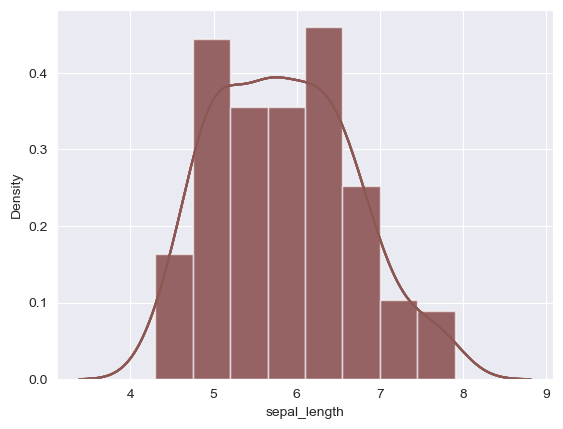

In [27]:
iris = iris.rename(columns= {'sepal length': 'sepal_length', 'sepal width': 'sepal_width', 'petal length': 'petal_length', 'petal width': 'petal_width'})

for column in iris:
    sns.distplot(iris['sepal_length'])
#'sepal width', 'petal length', 'petal width'])

In [20]:
columns_list = iris.columns.tolist()
print(columns_list)


['Unnamed: 0', 'sepal length', 'sepal width', 'petal length', 'petal width', 'species']


/var/folders/kd/15grz0v55ds97f9bw7zry13c0000gn/T/ipykernel_63995/2940906670.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris['sepal_width'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/kd/15grz0v55ds97f9bw7zry13c0000gn/T/ipykernel_63995/2940906670.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-l

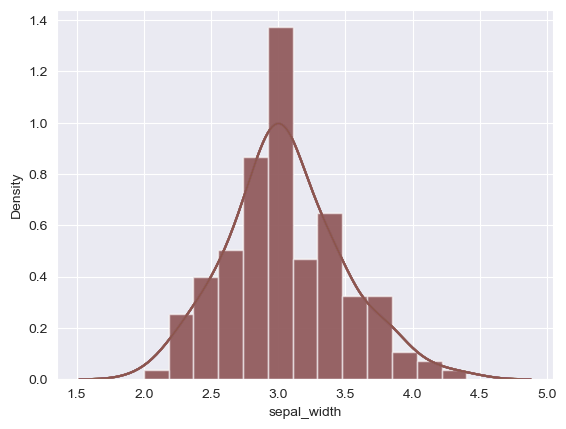

In [29]:

for column in iris:
    sns.distplot(iris['sepal_width'])

/var/folders/kd/15grz0v55ds97f9bw7zry13c0000gn/T/ipykernel_63995/2473768467.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris['petal_length'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/kd/15grz0v55ds97f9bw7zry13c0000gn/T/ipykernel_63995/2473768467.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-

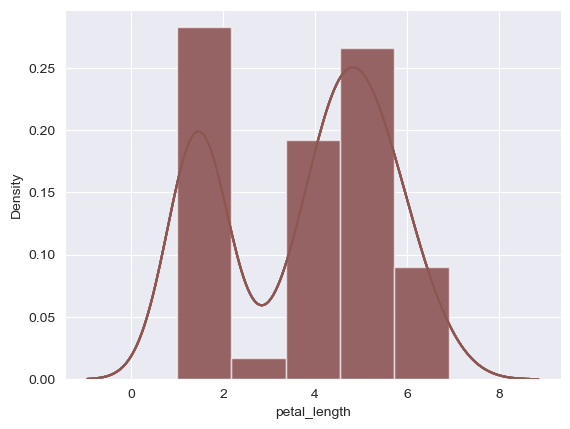

In [30]:


for column in iris:
    sns.distplot(iris['petal_length'])

/var/folders/kd/15grz0v55ds97f9bw7zry13c0000gn/T/ipykernel_63995/318104272.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris['petal_width'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/kd/15grz0v55ds97f9bw7zry13c0000gn/T/ipykernel_63995/318104272.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-lev

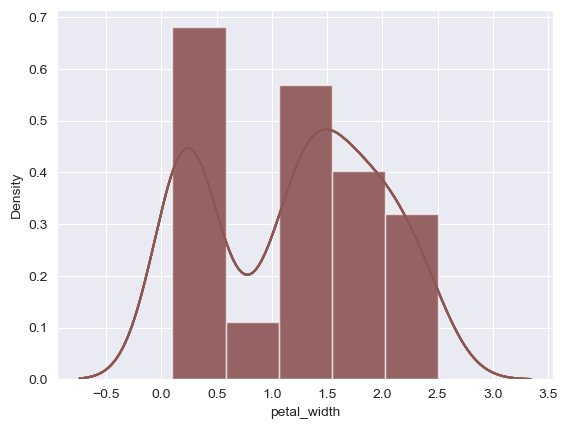

In [33]:
for column in iris:
    sns.distplot(iris['petal_width'])


KeyError: 'sepal_length'

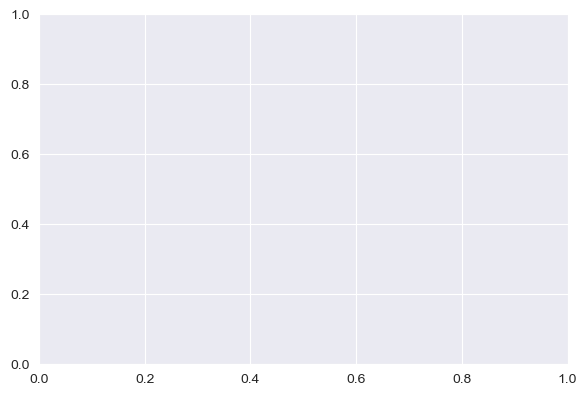

In [37]:
# List of feature columns to plot
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.figure(figsize=(15, 10))

# Plot the distribution of each feature using seaborn's distplot (deprecated, but still works in some versions)
for i, column in enumerate(feature_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

<Axes: ylabel='petal_length'>

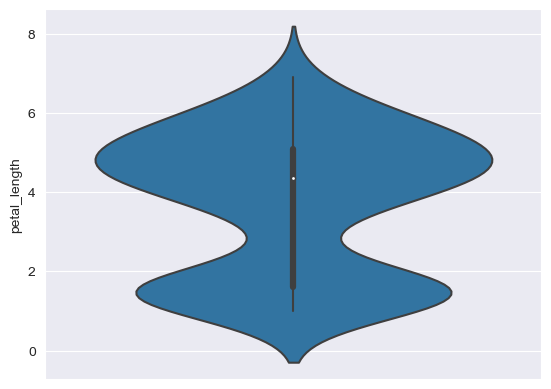

In [43]:

sns.violinplot(y=iris['petal_length'], orient = '')

KeyError: 'wight'

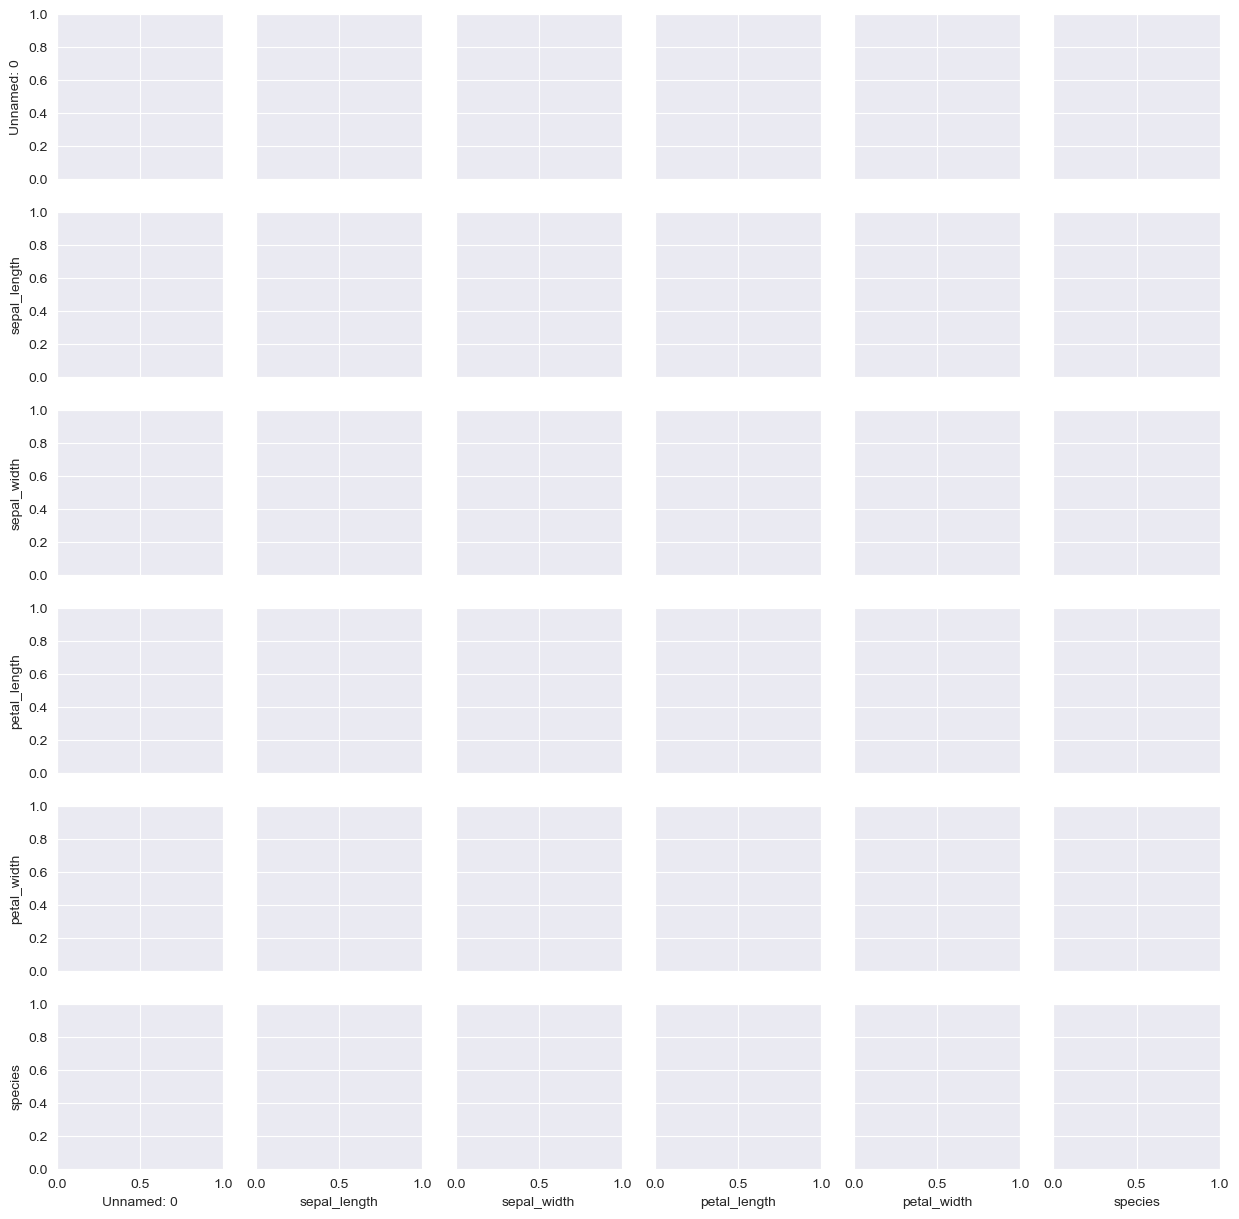

In [45]:
# hue="alive"
#
# # List of feature columns to plot
# feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
#
# plt.figure(figsize=(15, 10))
#
# # Plot the distribution of each feature using seaborn's distplot (deprecated, but still works in some versions)
# for i, column in enumerate(feature_columns, 1):
#     plt.subplot(2, 2, i)
#     sns.histplot(df[column], kde=True)
#     plt.title(f'Distribution of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Density')
#
# plt.tight_layout()
# plt.show()

sns.pairplot(iris)






In [47]:
import pandas as pd




s1 = pd.Series({
    "0": 'A',
    "1": 'A',
    "2": 'B',
    "3": 'B'
}, dtype="str")

s2 = pd.Series({
    "0": 10,
    "1": 14,
    "2": 12,
    "3": 23
}, dtype="int")

my_data = pd.DataFrame({
    "type": s1,
    "value": s2
})



print(my_data)

  type  value
0    A     10
1    A     14
2    B     12
3    B     23


In [32]:
import pandas as pd

my_stat = pd.read_csv('/Users/glebpankeev/Downloads/my_stat (3).csv')


my_data.head(11)


V1    V2 V3   V4
0    2  13.0  B  1.0
1   -1   7.0  B  1.0
2    0  11.0  A  0.0
3    2  11.0  A  2.0
4    0  10.0  B -1.0
5    2  11.0  A  0.0
6    0   9.0  A  2.0
7    1   9.0  A  1.0
8    0   9.0  B  2.0
9   -1  10.0  A  0.0
10   1  10.0  A  1.0

In [31]:
subset_1 = my_data.iloc[:10]
samara = subset_1.drop(['V2', 'V4'], axis=1)

subset_2 = my_data.iloc[::]
samara1 = subset_2.drop([0, 1], axis=0)
samara1 = subset_2.drop(['V1', 'V3'], axis=1)

print(samara)
print(samara1)

   V1 V3
0   2  B
1  -1  B
2   0  A
3   2  A
4   0  B
5   2  A
6   0  A
7   1  A
8   0  B
9  -1  A
       V2   V4
0    13.0  1.0
1     7.0  1.0
2    11.0  0.0
3    11.0  2.0
4    10.0 -1.0
..    ...  ...
495   8.0 -1.0
496   8.0  1.0
497  11.0  2.0
498  11.0  2.0
499   8.0  1.0

[500 rows x 2 columns]


In [42]:

subset_1 = my_stat.query('V1 > 0 & V3 == "A"')



subset_2 = my_stat.query('V2 != 10 | V4 >= 1')



print(subset_1)
print(subset_2)


     V1    V2 V3   V4
3     2  11.0  A  2.0
5     2  11.0  A  0.0
7     1   9.0  A  1.0
10    1  10.0  A  1.0
13    1  12.0  A  3.0
..   ..   ... ..  ...
491   4   7.0  A  2.0
494   1  11.0  A  1.0
495   1   8.0  A -1.0
496   3   8.0  A  1.0
498   1  11.0  A  2.0

[88 rows x 4 columns]
     V1    V2 V3   V4
0     2  13.0  B  1.0
1    -1   7.0  B  1.0
2     0  11.0  A  0.0
3     2  11.0  A  2.0
5     2  11.0  A  0.0
..   ..   ... ..  ...
495   1   8.0  A -1.0
496   3   8.0  A  1.0
497  -1  11.0  B  2.0
498   1  11.0  A  2.0
499   0   8.0  B  1.0

[447 rows x 4 columns]


In [46]:
import numpy as np

my_stat['V5'] = my_stat['V1'] + my_stat['V4']
my_stat['V6'] = np.log(my_stat['V2'])

print(my_stat)


     V1    V2 V3   V4   V5        V6
0     2  13.0  B  1.0  3.0  2.564949
1    -1   7.0  B  1.0  0.0  1.945910
2     0  11.0  A  0.0  0.0  2.397895
3     2  11.0  A  2.0  4.0  2.397895
4     0  10.0  B -1.0 -1.0  2.302585
..   ..   ... ..  ...  ...       ...
495   1   8.0  A -1.0  0.0  2.079442
496   3   8.0  A  1.0  4.0  2.079442
497  -1  11.0  B  2.0  1.0  2.397895
498   1  11.0  A  2.0  3.0  2.397895
499   0   8.0  B  1.0  1.0  2.079442

[500 rows x 6 columns]


In [47]:
my_stat.rename(index=str, columns={"V1": "session_value", "V2": "group", "V3": "time", "V4": "n_users", })

session_value  group time  n_users   V5        V6
0                2   13.0    B      1.0  3.0  2.564949
1               -1    7.0    B      1.0  0.0  1.945910
2                0   11.0    A      0.0  0.0  2.397895
3                2   11.0    A      2.0  4.0  2.397895
4                0   10.0    B     -1.0 -1.0  2.302585
..             ...    ...  ...      ...  ...       ...
495              1    8.0    A     -1.0  0.0  2.079442
496              3    8.0    A      1.0  4.0  2.079442
497             -1   11.0    B      2.0  1.0  2.397895
498              1   11.0    A      2.0  3.0  2.397895
499              0    8.0    B      1.0  1.0  2.079442

[500 rows x 6 columns]

In [57]:

import pandas as pd

my_stat = pd.read_csv('/Users/glebpankeev/Downloads/my_stat_1.csv')

my_stat = my_stat.rename(index=str, columns={"V1": "session_value", "V2": "group", "V3": "time", "V4": "n_users", })
my_stat['session_value'] = my_stat['session_value'].fillna(0)




median_n_users = my_stat[my_stat['n_users'] >= 0.0]['n_users'].median()

# Замена отрицательных значений в колонке n_users на медианное значение
my_stat.loc[my_stat['n_users'] < 0, 'n_users'] = median_n_users



print(my_stat)




   session_value  time group  n_users
0            0.0    12     B        9
1            0.0    11     A        5
2            1.0     8     A        1
3            2.0     9     B        3
4            2.0    10     B        9
5            3.0     8     A        8
6            0.0    11     B        5
7            0.0     9     A        4
8            0.0     8     B        5
9            0.0     9     A        5


In [73]:

import pandas as pd

my_stat = pd.read_csv('/Users/glebpankeev/Downloads/my_stat_1.csv')




mean_session_value_data = my_stat.groupby('group', as_index=False).agg({'session_value': 'mean'}).rename(index=str, columns={"session_value": "mean_session_value_data"}).reset_index()

print(mean_session_value_data )

  index group  mean_session_value_data
0     0     A                      1.0
1     1     B                      1.0


In [83]:
import pandas as pd
from openpyxl import load_workbook

# Load the CSV file with appropriate encoding and error handling
csv_file_path = '/Users/glebpankeev/Desktop/книга_данные.csv'
csv_data = pd.read_csv(csv_file_path, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')

# Define the Excel file path and load the workbook
excel_file_path = '/Users/glebpankeev/Desktop/книга_шаблон.xlsx'
workbook = load_workbook(excel_file_path)
sheet = workbook.active

# Insert CSV data into Excel, starting from cell B2 to L42
for col_idx, col_name in enumerate(csv_data.columns, start=2):
    for row_idx, value in enumerate(csv_data[col_name].iloc[:41], start=2):
        sheet.cell(row=row_idx, column=col_idx, value=value)

# Save the updated Excel file
output_file_path = '/Users/glebpankeev/Desktop/обновленная_книга.xlsx'
workbook.save(output_file_path)

output_file_path


IllegalCharacterError: 

In [84]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.utils.exceptions import IllegalCharacterError

# Load the CSV file with appropriate encoding and error handling
csv_file_path = '/Users/glebpankeev/Desktop/книга_данные.csv'
csv_data = pd.read_csv(csv_file_path, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')

# Define the Excel file path and load the workbook
excel_file_path = '/Users/glebpankeev/Desktop/книга_шаблон.xlsx'
workbook = load_workbook(excel_file_path)
sheet = workbook.active

# Function to clean illegal characters
def clean_illegal_chars(value):
    if isinstance(value, str):
        return ''.join([c for c in value if c.isprintable()])
    return value

# Insert CSV data into Excel, starting from cell B2 to L42
for col_idx, col_name in enumerate(csv_data.columns, start=2):
    for row_idx, value in enumerate(csv_data[col_name].iloc[:41], start=2):
        try:
            cleaned_value = clean_illegal_chars(value)
            sheet.cell(row=row_idx, column=col_idx, value=cleaned_value)
        except IllegalCharacterError:
            continue

# Save the updated Excel file
output_file_path = '/Users/glebpankeev/Desktop/обновленная_книга.xlsx'
workbook.save(output_file_path)

output_file_path


'/Users/glebpankeev/Desktop/обновленная_книга.xlsx'

In [6]:
import pandas as pd
import numpy as np
import seaborn



In [7]:
events_train = pd.read_csv("https://stepik.org/media/attachments/course/4852/event_data_train.zip")
submissions_train = pd.read_csv("https://stepik.org/media/attachments/course/4852/submissions_data_train.zip")



In [8]:
events_train

step_id   timestamp      action  user_id
0          32815  1434340848      viewed    17632
1          32815  1434340848      passed    17632
2          32815  1434340848  discovered    17632
3          32811  1434340895  discovered    17632
4          32811  1434340895      viewed    17632
...          ...         ...         ...      ...
3480698    33375  1526772685      viewed    11677
3480699    32815  1526772750      viewed     5198
3480700    32815  1526772750  discovered     5198
3480701    32815  1526772750      passed     5198
3480702    33892  1526772811      viewed    18526

[3480703 rows x 4 columns]

In [9]:
submissions_train

step_id   timestamp submission_status  user_id
0         31971  1434349275           correct    15853
1         31972  1434348300           correct    15853
2         31972  1478852149             wrong    15853
3         31972  1478852164           correct    15853
4         31976  1434348123             wrong    15853
...         ...         ...               ...      ...
509099   120745  1501946959             wrong     2615
509100   120745  1503059927           correct    13177
509101   120745  1506348153             wrong    15253
509102   120745  1523035316             wrong     1424
509103   120745  1523382825             wrong     9422

[509104 rows x 4 columns]

In [10]:
events_train.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [11]:
events_train['date'] = pd.to_datetime(events_train.timestamp, unit='s')

In [12]:
events_train

step_id   timestamp      action  user_id                date
0          32815  1434340848      viewed    17632 2015-06-15 04:00:48
1          32815  1434340848      passed    17632 2015-06-15 04:00:48
2          32815  1434340848  discovered    17632 2015-06-15 04:00:48
3          32811  1434340895  discovered    17632 2015-06-15 04:01:35
4          32811  1434340895      viewed    17632 2015-06-15 04:01:35
...          ...         ...         ...      ...                 ...
3480698    33375  1526772685      viewed    11677 2018-05-19 23:31:25
3480699    32815  1526772750      viewed     5198 2018-05-19 23:32:30
3480700    32815  1526772750  discovered     5198 2018-05-19 23:32:30
3480701    32815  1526772750      passed     5198 2018-05-19 23:32:30
3480702    33892  1526772811      viewed    18526 2018-05-19 23:33:31

[3480703 rows x 5 columns]

In [13]:
events_train.date.min()

Timestamp('2015-06-15 04:00:48')

In [14]:
events_train.date.max()

Timestamp('2018-05-19 23:33:31')

In [15]:
events_train['day'] = events_train.date.dt.date

In [16]:
events_train


step_id   timestamp      action  user_id                date  \
0          32815  1434340848      viewed    17632 2015-06-15 04:00:48   
1          32815  1434340848      passed    17632 2015-06-15 04:00:48   
2          32815  1434340848  discovered    17632 2015-06-15 04:00:48   
3          32811  1434340895  discovered    17632 2015-06-15 04:01:35   
4          32811  1434340895      viewed    17632 2015-06-15 04:01:35   
...          ...         ...         ...      ...                 ...   
3480698    33375  1526772685      viewed    11677 2018-05-19 23:31:25   
3480699    32815  1526772750      viewed     5198 2018-05-19 23:32:30   
3480700    32815  1526772750  discovered     5198 2018-05-19 23:32:30   
3480701    32815  1526772750      passed     5198 2018-05-19 23:32:30   
3480702    33892  1526772811      viewed    18526 2018-05-19 23:33:31   

                day  
0        2015-06-15  
1        2015-06-15  
2        2015-06-15  
3        2015-06-15  
4        2015-06-15  
...             ...  
3480698  2018-05-19  
3480699  2018-05-19  
3480700  2018-05-19  
3480701  2018-05-19  
3480702  2018-05-19  

[3480703 rows x 6 columns]

<Axes: xlabel='day'>

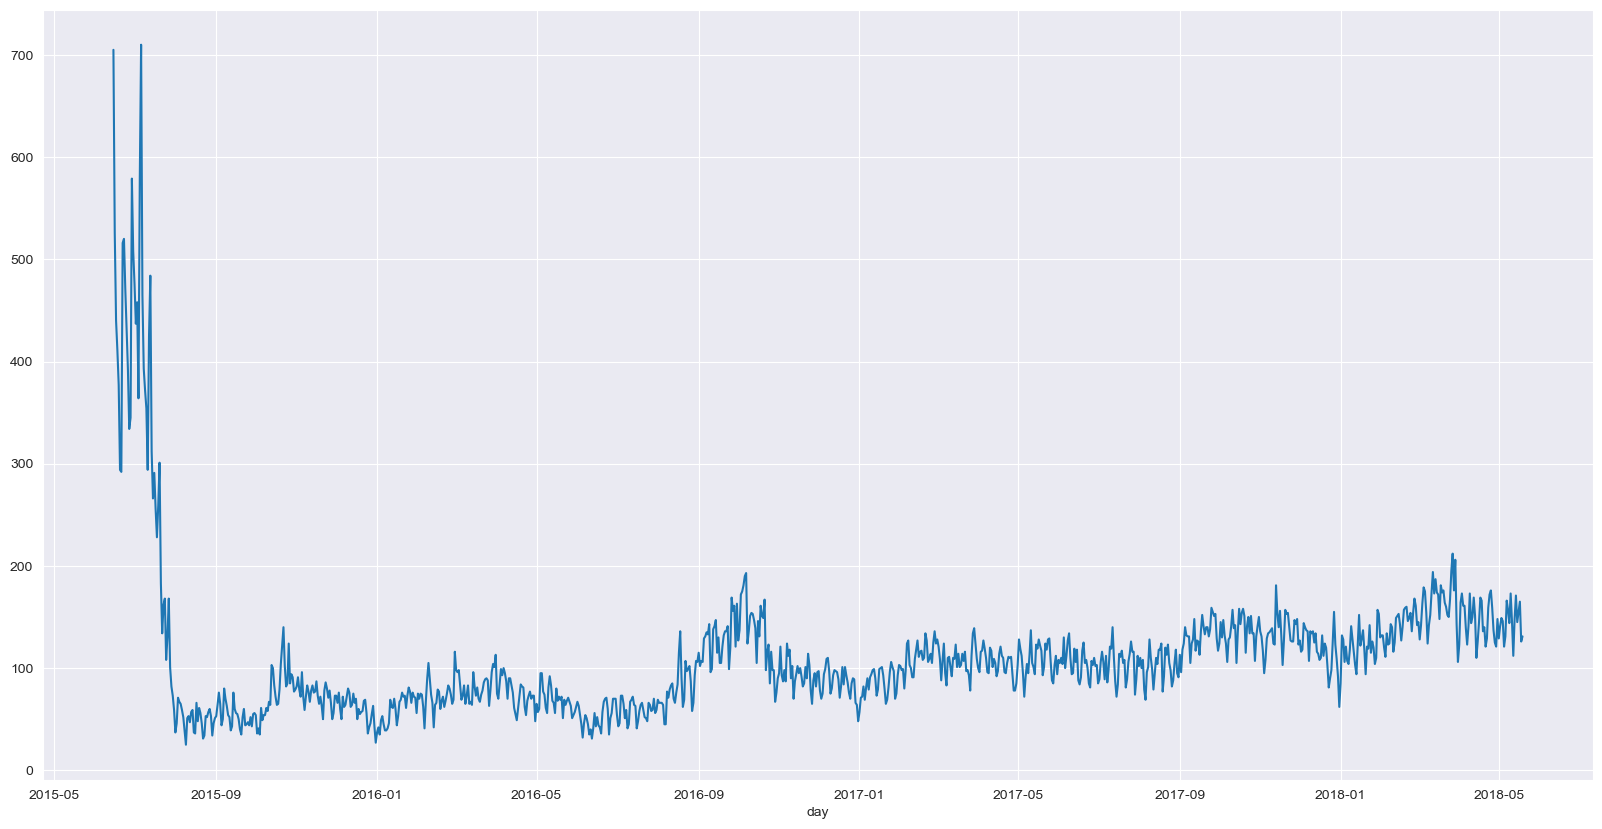

In [17]:
events_train.groupby('day').user_id.nunique().plot(figsize=(20,10))

<Axes: >

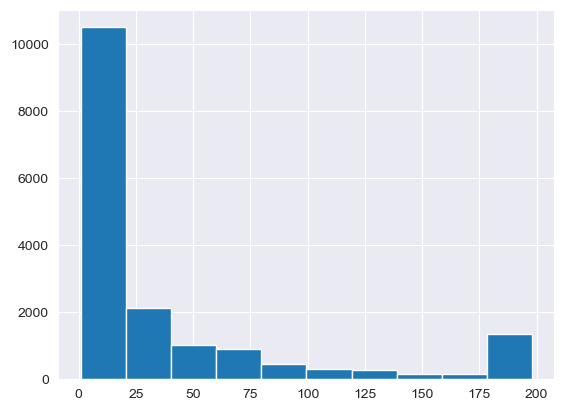

In [18]:
events_train[events_train.action == 'passed'].groupby('user_id', as_index=False).agg({'step_id': 'count'}).step_id.hist()

<Axes: >

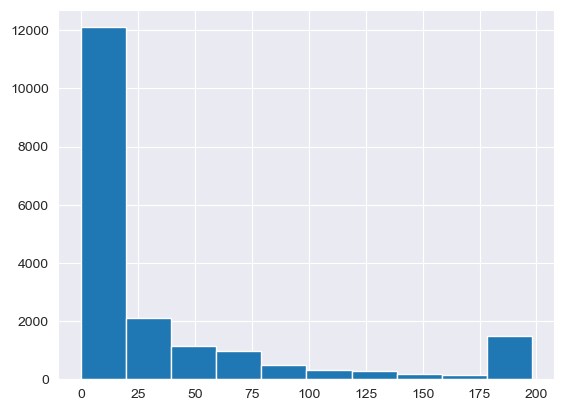

In [19]:
events_train.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).discovered.hist()

In [20]:


submissions_train['date'] = pd.to_datetime(submissions_train.timestamp, unit='s')
submissions_train['day'] = submissions_train.date.dt.date
submissions_train

step_id   timestamp submission_status  user_id                date  \
0         31971  1434349275           correct    15853 2015-06-15 06:21:15   
1         31972  1434348300           correct    15853 2015-06-15 06:05:00   
2         31972  1478852149             wrong    15853 2016-11-11 08:15:49   
3         31972  1478852164           correct    15853 2016-11-11 08:16:04   
4         31976  1434348123             wrong    15853 2015-06-15 06:02:03   
...         ...         ...               ...      ...                 ...   
509099   120745  1501946959             wrong     2615 2017-08-05 15:29:19   
509100   120745  1503059927           correct    13177 2017-08-18 12:38:47   
509101   120745  1506348153             wrong    15253 2017-09-25 14:02:33   
509102   120745  1523035316             wrong     1424 2018-04-06 17:21:56   
509103   120745  1523382825             wrong     9422 2018-04-10 17:53:45   

               day  
0       2015-06-15  
1       2015-06-15  
2       2016-11-11  
3       2016-11-11  
4       2015-06-15  
...            ...  
509099  2017-08-05  
509100  2017-08-18  
509101  2017-09-25  
509102  2018-04-06  
509103  2018-04-10  

[509104 rows x 6 columns]

In [21]:
users_scores = submissions_train.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0).reset_index()

users_scores

submission_status  user_id  correct  wrong
0                        2        2      0
1                        3       29     23
2                        5        2      2
3                        8        9     21
4                       14        0      1
...                    ...      ...    ...
9935                 26787        3      0
9936                 26790        1      0
9937                 26794       33      9
9938                 26797        2      0
9939                 26798        2      1

[9940 rows x 3 columns]

In [33]:
ev = events_train[['user_id', 'day', 'timestamp'] ].drop_duplicates(subset=['user_id', 'day']).groupby('user_id')['timestamp'].apply(list).apply(np.diff).values


ev = pd.Series(np.concatenate(ev, axis=0))
ev= ev / (24*60*60)

<Axes: >

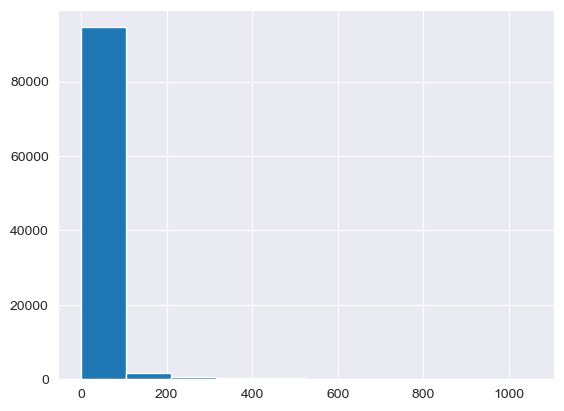

In [35]:
ev.hist()

In [39]:
ev.quantile(0.90)

18.325995370370403

In [38]:
submissions_train [submissions_train.submission_status == 'correct'].groupby('user_id').agg({'submission_status':'count'}).sort_values(by= ['submission_status'], ascending=False).head(5)

submission_status
user_id                   
1046                   421
5552                   186
17135                  168
6183                   142
8461                   135

In [40]:
events_train.tail()

step_id   timestamp      action  user_id                date  \
3480698    33375  1526772685      viewed    11677 2018-05-19 23:31:25   
3480699    32815  1526772750      viewed     5198 2018-05-19 23:32:30   
3480700    32815  1526772750  discovered     5198 2018-05-19 23:32:30   
3480701    32815  1526772750      passed     5198 2018-05-19 23:32:30   
3480702    33892  1526772811      viewed    18526 2018-05-19 23:33:31   

                day  
3480698  2018-05-19  
3480699  2018-05-19  
3480700  2018-05-19  
3480701  2018-05-19  
3480702  2018-05-19

In [47]:
user_data = events_train.groupby('user_id', as_index= False).agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})
user_data
now = 1526772811
drop_user = 2592000

In [48]:
user_data ['is_gone_user'] = (now - user_data.last_timestamp)>drop_user
user_data

user_id  last_timestamp  is_gone_user
0            1      1472827464          True
1            2      1519226966          True
2            3      1444581588          True
3            5      1499859939          True
4            7      1521634660          True
...        ...             ...           ...
19229    26790      1517495987          True
19230    26793      1510225034          True
19231    26794      1512035039          True
19232    26797      1509995096          True
19233    26798      1520978742          True

[19234 rows x 3 columns]

In [57]:


user_data=  user_data.merge(users_scores, how = 'outer').fillna(0)
user_data

user_id  last_timestamp  is_gone_user  correct  wrong
0            1      1472827464          True      0.0    0.0
1            2      1519226966          True      2.0    0.0
2            3      1444581588          True     29.0   23.0
3            5      1499859939          True      2.0    2.0
4            7      1521634660          True      0.0    0.0
...        ...             ...           ...      ...    ...
19229    26790      1517495987          True      1.0    0.0
19230    26793      1510225034          True      0.0    0.0
19231    26794      1512035039          True     33.0    9.0
19232    26797      1509995096          True      2.0    0.0
19233    26798      1520978742          True      2.0    1.0

[19234 rows x 5 columns]

In [62]:
users_events_data = submissions_train.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0).reset_index()

user_data = user_data.merge(users_events_data, how = 'outer')

user_data

user_id  last_timestamp  is_gone_user  correct  wrong
0            1      1472827464          True      0.0    0.0
1            2      1519226966          True      2.0    0.0
2            3      1444581588          True     29.0   23.0
3            5      1499859939          True      2.0    2.0
4            7      1521634660          True      0.0    0.0
...        ...             ...           ...      ...    ...
19229    26790      1517495987          True      1.0    0.0
19230    26793      1510225034          True      0.0    0.0
19231    26794      1512035039          True     33.0    9.0
19232    26797      1509995096          True      2.0    0.0
19233    26798      1520978742          True      2.0    1.0

[19234 rows x 5 columns]

In [29]:
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

X_1  X_2  Y
0    1    0  1
1    1    0  1
2    1    0  1
3    0    1  1
4    0    0  0
5    0    0  0
6    0    0  0
7    1    1  0

In [21]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(criterion='entropy')

In [22]:
X = data [['X_1', 'X_2']]
y = data.Y

In [12]:
X

X_1  X_2
0    1    0
1    1    0
2    1    0
3    0    1
4    0    0
5    0    0
6    0    0
7    1    1

In [23]:
y

0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    0
Name: Y, dtype: int64

In [25]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

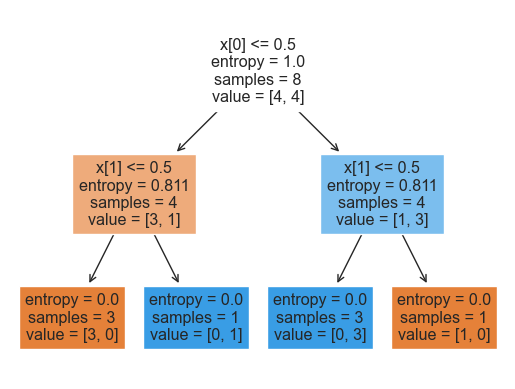

In [26]:
from sklearn.tree import plot_tree
plot_tree(clf,filled=True);

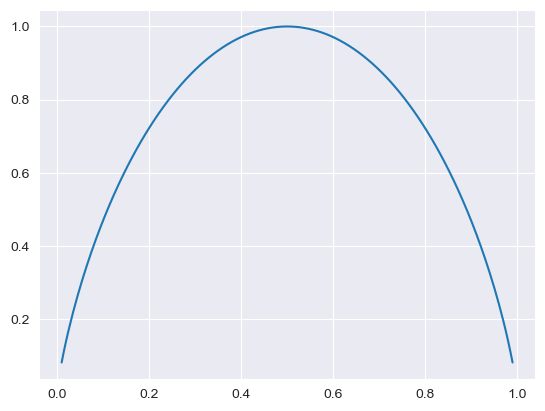

In [27]:
def entropy(p):
    return (-p * np.log(p) - (1-p) * np.log(1-p))/np.log(2.)
x = np.linspace(0.01, 0.99, 200)
plt.plot(x, entropy(x))

In [56]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv',  index_col
= 0)
data

Шерстист  Гавкает  Лазает по деревьям      Вид
0         1        1                   0  собачка
1         1        1                   0  собачка
2         1        1                   0  собачка
3         1        1                   0  собачка
4         1        0                   1    котик
5         1        0                   1    котик
6         1        0                   1    котик
7         1        0                   1    котик
8         1        1                   1    котик
9         0        0                   1    котик

In [57]:
X1 = data [['Шерстист', 'Гавкает', 'Лазает по деревьям']]
Y1 = data['Вид']

In [58]:
X1

Шерстист  Гавкает  Лазает по деревьям
0         1        1                   0
1         1        1                   0
2         1        1                   0
3         1        1                   0
4         1        0                   1
5         1        0                   1
6         1        0                   1
7         1        0                   1
8         1        1                   1
9         0        0                   1

In [59]:
Y1

0    собачка
1    собачка
2    собачка
3    собачка
4      котик
5      котик
6      котик
7      котик
8      котик
9      котик
Name: Вид, dtype: object

In [63]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy')

In [64]:
clf1.fit(X1, Y1)

DecisionTreeClassifier(criterion='entropy')

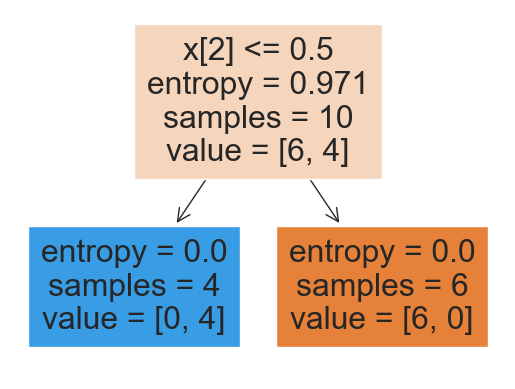

In [65]:
plot_tree(clf1, filled=True);

In [68]:
X1 = data[['Шерстист', 'Гавкает', 'Лазает по деревьям']]
Y1 = data['Вид']

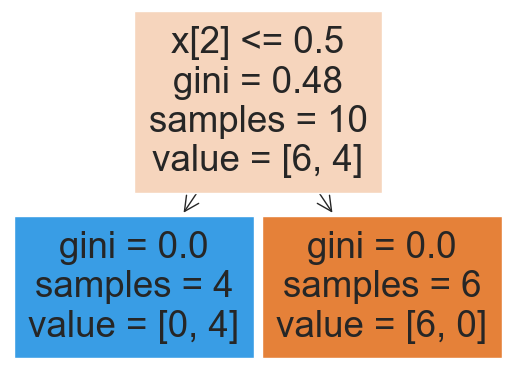

In [73]:
#criterion='entropy'
clf1 = tree.DecisionTreeClassifier()
clf1.fit(X1, Y1)
plot_tree(clf1, filled=True);

In [77]:
import math as m
E_sh_sob=(1/1)*m.log2((1/1)) - 0
E_sh_kot=-(4/9)*m.log2((4/9)) - (5/9)*m.log2((5/9))
E_gav_sob=0 - (5/5)*m.log2((5/5))
E_gav_kot=-(4/5)*m.log2((4/5)) - (1/5)*m.log2((1/5))
E_laz_sob=0 - (6/6)*m.log2((6/6))
E_laz_kot=-(4/4)*m.log2((4/4)) - 0

E_kot=-(4/10)*m.log2((4/10)) - (6/10)*m.log2((6/10))


E = [E_gav_kot, E_gav_sob, E_laz_kot, E_laz_sob, E_sh_kot, E_sh_sob, E_kot ]
res2 = 1.028771237954945
for i in range(len(E)):
    res1 = res2 - E[i]
    res1.__round__()
    print(res1)

print (E_gav_kot, E_gav_sob, E_laz_kot, E_laz_sob, E_sh_kot, E_sh_sob, E_kot)


import math


def ent(cats=0, dogs=0):
    p_cats = cats/(cats+dogs)
    p_dogs = dogs/(cats+dogs)
    sx1 = -p_cats * math.log2(p_cats) if p_cats else 0
    sx2 = -p_dogs * math.log2(p_dogs) if p_dogs else 0
    return sx1 + sx2

print('Шерстист=0 branch entropy', ent(cats=1))
print('Шерстист=1 branch entropy', ent(cats=5, dogs=4))
print('Гавкает=0 branch entropy', ent(cats=5))
print('Гавкает=1 branch entropy', ent(cats=1, dogs=4))
print('Лазает=0 branch entropy', ent(dogs=4))
print('Лазает=1 branch entropy', ent(cats=6))




# IG = E(Y) - E(Y/X)

# Шерстист
N = 10 
E_YX_SHERSTIT = (1/N) * 0 + (9/10) * 0.99
IG_SHERSTIT = 0.97 - E_YX_SHERSTIT

# Гавкает
E_YX_GAVKAET = (5/N) * 0 + (5/10) * 0.72
IG_GAVKAET = 0.97 - E_YX_GAVKAET

# Лазает
E_YX_LAZAET = (4/N) * 0 + (6/10) * 0
IG_LAZAET = 0.97 - E_YX_LAZAET

print(f"IG_Шерстист | IG_Гавкает | IG_Лазает\n{round(IG_SHERSTIT, 2)} {IG_GAVKAET} {IG_LAZAET}")

0.30684314306758265
1.028771237954945
1.028771237954945
1.028771237954945
0.03769517811672274
1.028771237954945
0.05782064350027638
0.7219280948873623 0.0 -0.0 0.0 0.9910760598382222 0.0 0.9709505944546686
Шерстист=0 branch entropy 0.0
Шерстист=1 branch entropy 0.9910760598382222
Гавкает=0 branch entropy 0.0
Гавкает=1 branch entropy 0.7219280948873623
Лазает=0 branch entropy 0.0
Лазает=1 branch entropy 0.0
IG_Шерстист | IG_Гавкает | IG_Лазает
0.08 0.61 0.97


In [109]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree



from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

In [110]:
train =  pd.read_csv('/Users/glebpankeev/Downloads/titanic/train.csv')
test = pd.read_csv('/Users/glebpankeev/Downloads/titanic/test.csv')
gender_submission = pd.read_csv('/Users/glebpankeev/Downloads/titanic/gender_submission.csv')

In [111]:
train


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [112]:
train.isnull().sum()
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [113]:
X = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
Y = train.Survived
X = pd.get_dummies(X)
X.Age.median()
X = X.fillna({'Age': X.Age.median()})

In [114]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [115]:
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

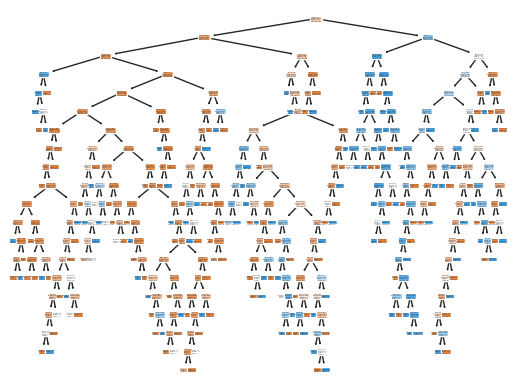

In [116]:
plot_tree(clf, filled=True);

In [117]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

[Text(0.615234375, 0.975, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.389294914874552, 0.925, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(0.1912242383512545, 0.875, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(0.06630824372759857, 0.825, 'SibSp <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(0.05913978494623656, 0.775, 'Age <= 10.0\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(0.05197132616487455, 0.725, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.06630824372759857, 0.725, 'SibSp <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05913978494623656, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07347670250896057, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07347670250896057, 0.775, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3161402329749104, 0.825, 'Embarked_C <= 0.5\nentropy = 0.477\nsamples =

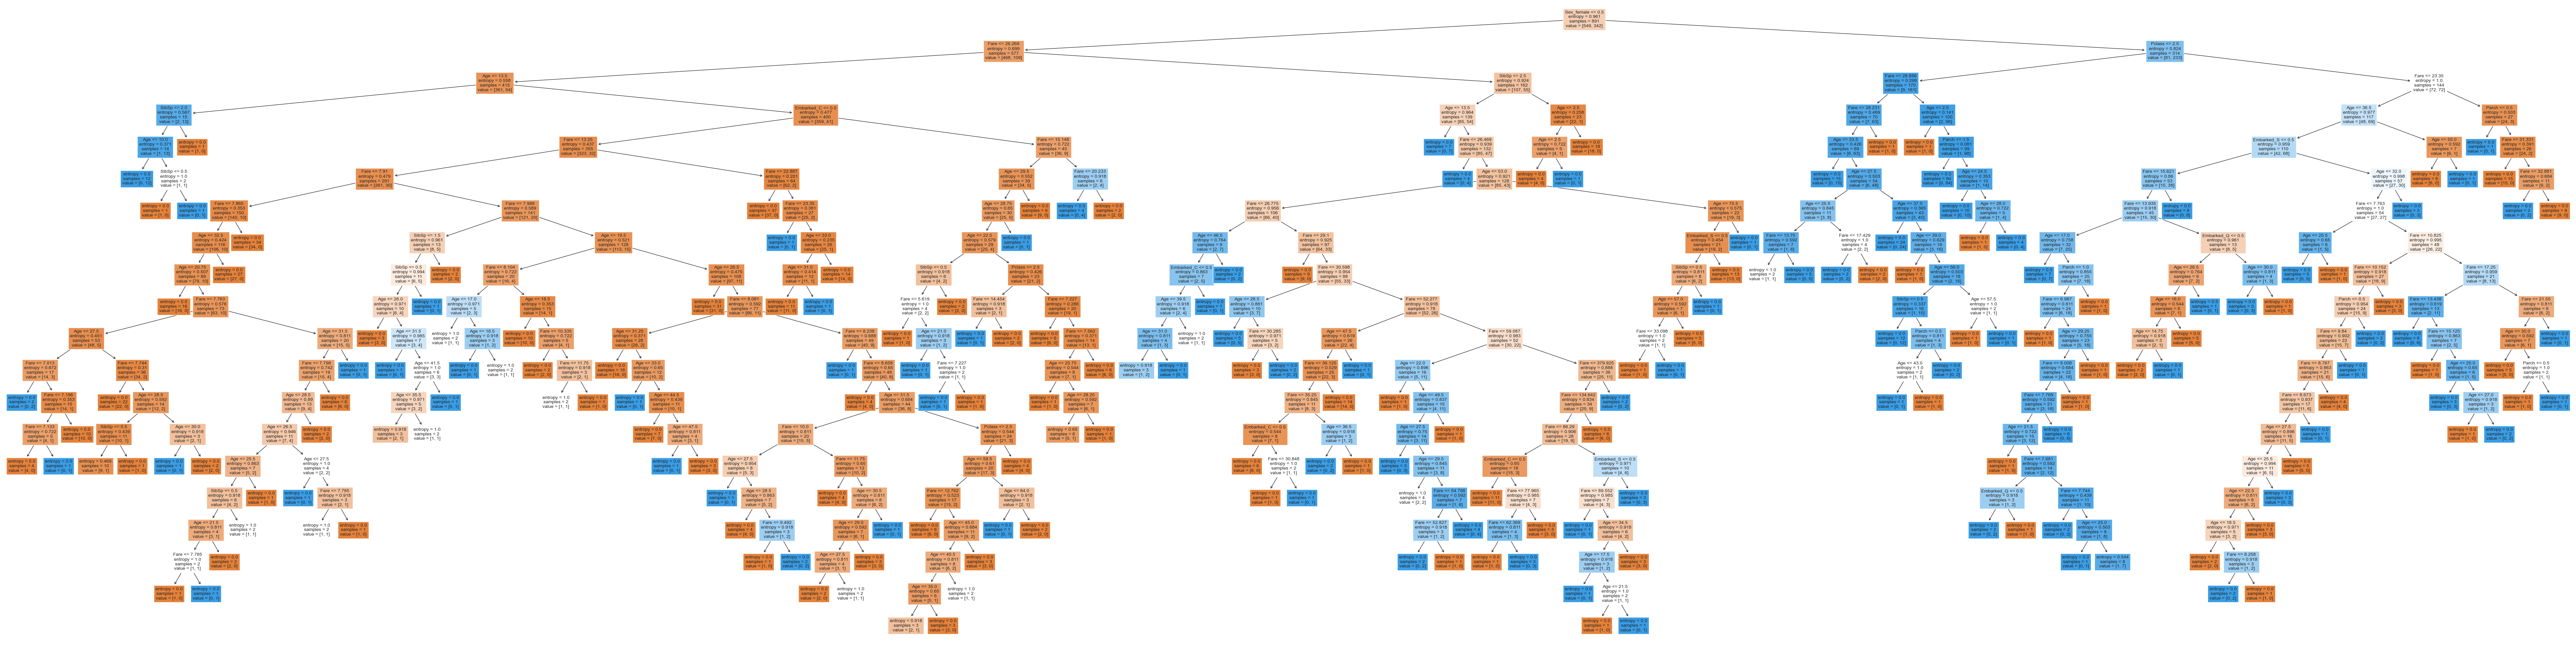

In [118]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

X_train

Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male  Embarked_C  \
6         1  54.0      0      0   51.8625       False      True       False   
718       3  28.0      0      0   15.5000       False      True       False   
685       2  25.0      1      2   41.5792       False      True        True   
73        3  26.0      1      0   14.4542       False      True        True   
882       3  22.0      0      0   10.5167        True     False       False   
..      ...   ...    ...    ...       ...         ...       ...         ...   
106       3  21.0      0      0    7.6500        True     False       False   
270       1  28.0      0      0   31.0000       False      True       False   
860       3  41.0      2      0   14.1083       False      True       False   
435       1  14.0      1      2  120.0000        True     False       False   
102       1  21.0      0      1   77.2875       False      True       False   

     Embarked_Q  Embarked_S  
6         False        True  
718        True       False  
685       False       False  
73        False       False  
882       False        True  
..          ...         ...  
106       False        True  
270       False        True  
860       False        True  
435       False        True  
102       False        True  

[596 rows x 10 columns]

In [127]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [128]:
clf.score(X_train, y_train)

0.9798657718120806

In [124]:
clf.score(X, Y)

0.9797979797979798

In [129]:
clf.score(X_test, y_test)

0.7728813559322034

In [134]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth= 3)

In [135]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [136]:
clf.score(X_train, y_train)

0.8238255033557047

In [137]:
clf.score(X_test, y_test)

0.8203389830508474

In [168]:
max_depth_values = range(1, 100)

In [169]:
scores_data = pd.DataFrame()

In [1]:
from sklearn.model_selection import cross_val_score

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score], 'cross_val_score': [mean_cross_val_score]})
    
    scores_data = pd.concat([scores_data, temp_score_data])

NameError: name 'max_depth_values' is not defined

In [228]:
scores_data

max_depth  train_score  test_score  cross_val_score
0           1     0.781879    0.796610         0.781961
0           2     0.805369    0.776271         0.770196
0           3     0.823826    0.820339         0.790322
0           4     0.833893    0.823729         0.788627
0           5     0.840604    0.806780         0.800392
..        ...          ...         ...              ...
0          95     1.000000    0.920000         0.960000
0          96     1.000000    0.920000         0.960000
0          97     1.000000    0.940000         0.960000
0          98     1.000000    0.940000         0.960000
0          99     1.000000    0.940000         0.960000

[495 rows x 4 columns]

In [174]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars = ['train_score', 'test_score', 'cross_val_score'], var_name = 'set_type', value_name = 'score')

In [175]:
scores_data_long.head(200)

max_depth     set_type     score
0            1  train_score  0.781879
1            2  train_score  0.805369
2            3  train_score  0.823826
3            4  train_score  0.833893
4            5  train_score  0.840604
..         ...          ...       ...
195         97  train_score  0.979866
196         98  train_score  0.979866
197         99  train_score  0.979866
198          1   test_score  0.796610
199          2   test_score  0.776271

[200 rows x 3 columns]

In [183]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)


max_depth         set_type     score
396          1  cross_val_score  0.781961
397          2  cross_val_score  0.770196
398          3  cross_val_score  0.790322
399          4  cross_val_score  0.788627
400          5  cross_val_score  0.800392
401          6  cross_val_score  0.800392
402          7  cross_val_score  0.800378
403          8  cross_val_score  0.805406
404          9  cross_val_score  0.795322
405         10  cross_val_score  0.795308
406         11  cross_val_score  0.802031
407         12  cross_val_score  0.790294
408         13  cross_val_score  0.795308
409         14  cross_val_score  0.797003
410         15  cross_val_score  0.791989
411         16  cross_val_score  0.781919
412         17  cross_val_score  0.783599
413         18  cross_val_score  0.780266
414         19  cross_val_score  0.770168
415         20  cross_val_score  0.768501

In [187]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth= 6)
cross_val_score(best_clf, X_train, y_train, cv=5).mean()

0.8037535014005602

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='max_depth', ylabel='score'>

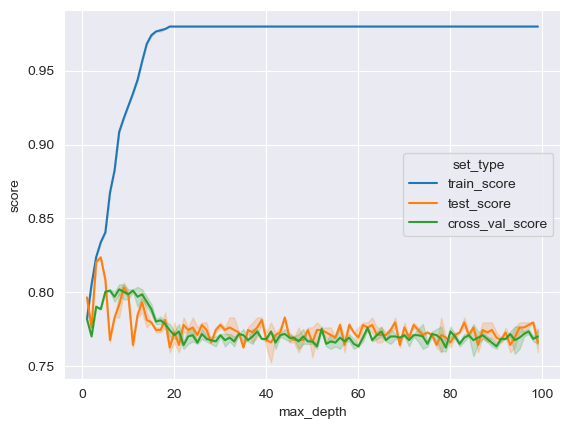

In [177]:
sns.lineplot(x = 'max_depth', y = 'score' , hue = 'set_type' , data = scores_data_long)

In [162]:
from sklearn.model_selection import cross_val_score

In [163]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth= 4)

In [165]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [2]:
from sklearn import tree

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline 

from IPython.display import SVG

from graphviz import Source

from IPython.display import display 

from IPython.display import HTML

style = "<style>svg{width:50% !important;height:30% !important;}</style>"

HTML(style)

In [8]:
data =   pd.read_csv('pd.read_csv(/Users/glebpankeev/Downloads/train_iris.csv', index_col=0)
test = pd.read_csv('pd.read_csv(/Users/glebpankeev/Downloads/test_iris.csv', index_col=0)

data

FileNotFoundError: [Errno 2] No such file or directory: 'pd.read_csv(/Users/glebpankeev/Downloads/train_iris.csv'

In [239]:
X_train = data[['sepal length', 'sepal width', 'petal length', 'petal width']]

X_test = test[['sepal length', 'sepal width', 'petal length', 'petal width']]


y_train = data.species

y_test = test.species


In [48]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(random_state=np.random.seed(max_depth), criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    plot_tree(clf, filled=True);
    # data_score = clf.score(X_train, y_train)
    # test_score = clf.score(X_test, y_test)
    # 
    # 
    # temp_data_score1 = pd.DataFrame({'max_depth': [max_depth], 'data_score': [data_score ], 'test_score': [test_score]})
    # 
    # 
    # 
    # scores_data1 = pd.concat([data_score, temp_data_score1])


NameError: name 'plot_tree' is not defined

In [16]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)



iris_train =  pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
iris_test  = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)

X_train = iris_train.drop(['species'], axis=1)
y_train = iris_train.species
X_test = iris_test.drop(['species'], axis=1)
y_test = iris_test.species

max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
np.random.seed(0)
rs = np.random.seed(0)
max_depth_values = range(1, 100)
scores_data = []

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = {
        'max_depth': max_depth,
        'train_score': train_score,
        'test_score': test_score
    }
    scores_data.append(temp_score_data)

scores_df = pd.DataFrame(scores_data)

In [17]:
scores_df

max_depth  train_score  test_score
0           1         0.70        0.60
1           2         0.97        0.94
2           3         0.99        0.94
3           4         1.00        0.92
4           5         1.00        0.92
..        ...          ...         ...
94         95         1.00        0.92
95         96         1.00        0.92
96         97         1.00        0.92
97         98         1.00        0.94
98         99         1.00        0.92

[99 rows x 3 columns]

In [20]:
scores_data_long = pd.melt(scores_df, id_vars=['max_depth'], value_vars = ['train_score', 'test_score'], var_name = 'set_type', value_name = 'score')

best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth= 6)
#cross_val_score(best_clf, X_train, y_train, cv=5).mean()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='max_depth', ylabel='score'>

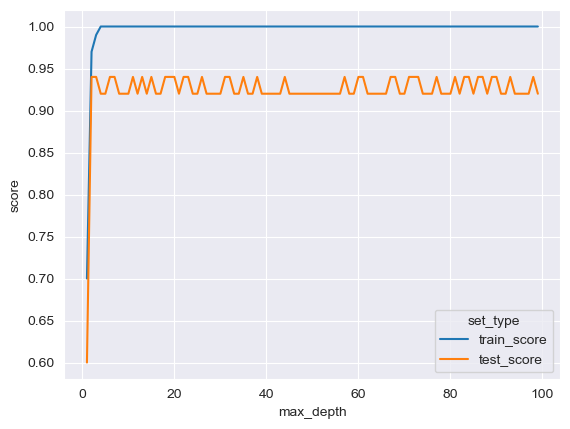

In [21]:

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)


In [ ]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)



dogcat_train =  pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv', index_col=0)
# iris_test  = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)

X_train = iris_train.drop(['species'], axis=1)
y_train = iris_train.species
X_test = iris_test.drop(['species'], axis=1)
y_test = iris_test.species

max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
np.random.seed(0)
rs = np.random.seed(0)
max_depth_values = range(1, 100)
scores_data = []

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = {
        'max_depth': max_depth,
        'train_score': train_score,
        'test_score': test_score
    }
    scores_data.append(temp_score_data)

scores_df = pd.DataFrame(scores_data)

In [91]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)
from sklearn.model_selection import train_test_split


 # from sklearn.tree import plot_tree
 #    plot_tree(clf, filled=True)

In [122]:
dogcat_train =  pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv', index_col=0)
dogcat_test = pd.read_json('/Users/glebpankeev/Downloads/dataset_209691_15.txt', orient='records')
dogcat_train.reset_index(inplace=True)


In [115]:
dogcat_test

Длина  Высота  Шерстист  Гавкает  Лазает по деревьям
0      17    20.4         1        1                   0
1      32    38.4         1        1                   0
2      22    26.4         1        1                   0
3      33    39.6         1        1                   0
4      23    27.6         1        1                   0
..    ...     ...       ...      ...                 ...
95     12     4.8         1        0                   1
96      9     3.6         1        0                   1
97     11     4.4         1        0                   1
98      5     2.0         1        0                   1
99      6     2.4         1        0                   1

[100 rows x 5 columns]

In [123]:
print(dogcat_test.columns)
print(dogcat_train.columns
      )

Index(['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям'], dtype='object')
Index(['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям', 'Вид'], dtype='object')


In [126]:
x1 = dogcat_train[['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']]
y1 = dogcat_train['Вид']
# Выбор необходимых столбцов для x2 из dogcat_test

x2 = dogcat_test[['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']]
y2 = y1

In [132]:
# Предполагаем, что x1 и y1 уже определены
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

# Инициализация DataFrame для хранения результатов
scores_data = pd.DataFrame()
max_depth_values = range(1, 100)

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=0)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_train)
    
    temp_score_data = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score]
    })
    scores_data = pd.concat([scores_data, temp_score_data], ignore_index=True)

# Просмотр результатов
print(scores_data)

ValueError: Found input variables with inconsistent numbers of samples: [700, 300]

In [137]:
# Импорт библиотек
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Загрузка данных
dogs_n_cats_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
dogs_n_cats_test = pd.read_json('/Users/glebpankeev/Downloads/dataset_209691_15.txt', orient='records')  # Заменить на ваш файл и путь к нему

# Создание выборок
X_train = dogs_n_cats_train.drop(['Вид'], axis=1)
y_train = dogs_n_cats_train['Вид']

# Объявление модели
clf = DecisionTreeClassifier()
# Обучение модели на тренировочных данных
clf.fit(X_train, y_train)

# Предсказание на тестовых данных с записью результатов в pd.Series с названием колонки 'Вид'
y_pred = pd.Series(clf.predict(dogs_n_cats_test), name='Вид')

# Подсчет значений в предсказанных данных
y_pred.value_counts()

Вид
котик      51
собачка    49
Name: count, dtype: int64

In [139]:
import numpy as np
from sklearn.metrics import precision_score
y_true = [15, 30]
y_pred = [15,40]
precision_score(y_true, y_pred)



ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [130]:
scores_data = pd.DataFrame()
rs = np.random.seed(0)
max_depth_values = range(1, 100)

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
   # test_score = clf.score(X_test, y_train)
#     test_score = clf.score(X_test, y_train)
#     
#     
#     
    temp_score_data = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score]
    })
   scores_data = pd.concat([scores_data, temp_score_data], ignore_index=True)

# Просмотр результатов
print(scores_data)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 19)

In [140]:
TP = 15
FN = 30
FP = 15
TN = 40 

Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

F1 = 2 * (Precision * Recall) / (Precision + Recall)

print(f"Precision={Precision}\nRecall={Recall}\nF1={F1}")

Precision=0.5
Recall=0.3333333333333333
F1=0.4


In [144]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

In [151]:
songs = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv', index_col=0)

songs

year          artist    genre  \
song                                                  
the-ownerz            2007       gangstarr  Hip-Hop   
dead-sound-of-misery  2006  blind-guardian    Metal   
modred-s-song         2006  blind-guardian    Metal   
the-ninth-wave        2015  blind-guardian    Metal   
skills                2014       gangstarr  Hip-Hop   
...                    ...             ...      ...   
just-like-that        2006            abba      Pop   
ring-ring             1995            abba      Pop   
reina-danzante        1981            abba      Pop   
code-of-the-streets   2006       gangstarr  Hip-Hop   
one-of-us             2001            abba      Pop   

                                                                 lyrics  \
song                                                                      
the-ownerz            "One-two.."\n"One-two, shots to the chin.. kno...   
dead-sound-of-misery  It's dark\nLet's do it now\nBring in the siren...   
modred-s-song         I've lost my battle before it starts\nmy first...   
the-ninth-wave        As dark night embraces\nWe are the nation\nI w...   
skills                Skills, skills, skills\n"My Microphone"\n"It's...   
...                                                                 ...   
just-like-that        Until that day\nMy life had been a river\nFoll...   
ring-ring             I was sitting by the phone\nI was waiting all ...   
reina-danzante        You can dance\nYou can jive\nHaving the time o...   
code-of-the-streets   Take this for example young brothers want rep\...   
one-of-us             They passed me by, all of those great romances...   

                      length  commas  exclamations  colons  hyphens  
song                                                                 
the-ownerz              1300      24             5       0       11  
dead-sound-of-misery    1566       0             0       0        0  
modred-s-song            996       1             0       1        0  
the-ninth-wave          2868       5             0       0        0  
skills                  3351      22             0       0        3  
...                      ...     ...           ...     ...      ...  
just-like-that           972       2             0       0        1  
ring-ring               1283      33             0       0        3  
reina-danzante           810       1             0       0        0  
code-of-the-streets     1996      34             0       0        5  
one-of-us                991       8             0       0        0  

[360 rows x 9 columns]

In [153]:




X_train = songs[['year', 'length', 'commas', 'exclamations',
       'colons', 'hyphens']]
Y_train = songs['artist']


X_test


In [150]:
songs.columns

Index(['year', 'artist', 'genre', 'lyrics', 'length', 'commas', 'exclamations',
       'colons', 'hyphens'],
      dtype='object')

In [154]:
clf = tree.DecisionTreeClassifier()

In [155]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
predictions = clf.predict(songs, )

In [156]:



# Импорт библиотек
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

# Загрузка данных
songs_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')

# Создание выборок
X = songs_data.drop(['song', 'artist', 'lyrics', 'genre'], axis=1)
y = songs_data['artist']
#genres = pd.get_dummies(songs_data['genre'])
#X = pd.concat([X, genres], axis=1)

# Разбивка выборок
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.333) 

# Объявление модели
clf = DecisionTreeClassifier()
# Обучение модели на тренировочных данных
clf.fit(X_train, y_train)

# Предсказание на тестовых данных с записью результата в формате pd.Series
predictions = pd.Series(clf.predict(X_test), name='artist')

# Вычисление precision
precision = precision_score(y_test, predictions, average='micro')
print('Precision:', precision)

Precision: 0.725


In [157]:
from sklearn.model_selection import GridSearchCV

In [159]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [160]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30), 'min' }

In [162]:
grid_search_cv_clf = GridSearchCV(clf,parametrs, cv=5)
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [163]:
grid_search_cv_clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [164]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [167]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

0.7083333333333334

In [174]:
from sklearn.metrics import precision_score, recall_score

In [179]:
y_pred = best_clf.predict(X_test)
y_pred

array(['abba', 'blind-guardian', 'gangstarr', 'abba', 'blind-guardian',
       'abba', 'abba', 'gangstarr', 'gangstarr', 'blind-guardian',
       'gangstarr', 'abba', 'blind-guardian', 'blind-guardian',
       'gangstarr', 'blind-guardian', 'abba', 'gangstarr', 'gangstarr',
       'abba', 'blind-guardian', 'gangstarr', 'abba', 'abba', 'abba',
       'abba', 'gangstarr', 'gangstarr', 'gangstarr', 'blind-guardian',
       'blind-guardian', 'abba', 'blind-guardian', 'blind-guardian',
       'abba', 'abba', 'abba', 'blind-guardian', 'blind-guardian',
       'blind-guardian', 'blind-guardian', 'blind-guardian', 'gangstarr',
       'abba', 'abba', 'blind-guardian', 'abba', 'gangstarr', 'gangstarr',
       'blind-guardian', 'gangstarr', 'abba', 'blind-guardian',
       'gangstarr', 'abba', 'gangstarr', 'blind-guardian', 'abba', 'abba',
       'blind-guardian', 'abba', 'gangstarr', 'blind-guardian',
       'gangstarr', 'abba', 'blind-guardian', 'blind-guardian',
       'blind-guardian', 'blind

In [176]:
precision_score(y_test, y_pred, average='micro')

0.7083333333333334

In [175]:
recall_score(y_test, y_pred, average='micro')

0.7083333333333334

In [178]:
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[1.        , 0.        , 0.        ],
       [0.2       , 0.7       , 0.1       ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.07317073, 0.92682927, 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.2       , 0.7       , 0.1       ],
       [0.        , 0.        , 1.        ],
       [0.07317073, 0.92682927, 0.        ],
       [0.73333333, 0.2       , 0.06666667],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.

<Axes: >

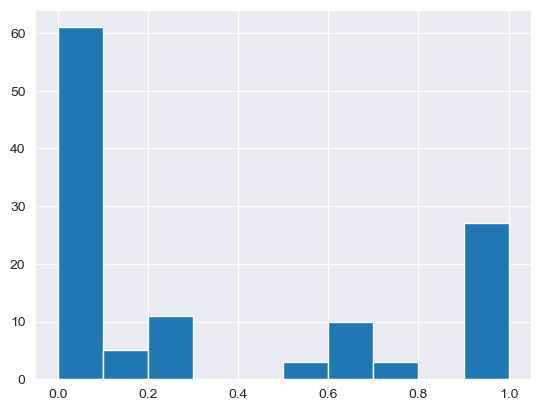

In [181]:
pd.Series(y_predicted_prob[:,1]).hist()

In [183]:
np.where((y_predicted_prob[:,1]) > 0.8, 1, 0)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [184]:
y_pred = np.where((y_predicted_prob[:,1]) > 0.8, 1, 0)

In [186]:
precision_score(y_test, y_pred, average='micro')


ValueError: Mix of label input types (string and number)

In [ ]:
recall_score(y_test, y_pred, average='micro')

In [187]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ValueError: multiclass format is not supported

In [22]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import plot

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [3]:
dt = DecisionTreeClassifier(max_depth = 5,  min_samples_split = 5, criterion = 'entropy')


In [4]:
data = pd.read_csv ('https://stepik.org/media/attachments/course/4852/train_data_tree.csv', index_col=0)
data.reset_index(inplace=True)
data

sex  exang  num
0      1      1    1
1      1      1    1
2      1      0    1
3      1      0    0
4      1      0    1
..   ...    ...  ...
233    1      0    0
234    1      1    0
235    1      0    1
236    1      1    1
237    1      0    0

[238 rows x 3 columns]

In [5]:
X = data[['sex','exang']]
y = data['num']

In [12]:
X

sex  exang
0      1      1
1      1      1
2      1      0
3      1      0
4      1      0
..   ...    ...
233    1      0
234    1      1
235    1      0
236    1      1
237    1      0

[238 rows x 2 columns]

In [13]:
y

0      1
1      1
2      1
3      0
4      1
      ..
233    0
234    0
235    1
236    1
237    0
Name: num, Length: 238, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.333) 

In [19]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

In [20]:
dt.score(X_test, y_test)

0.725

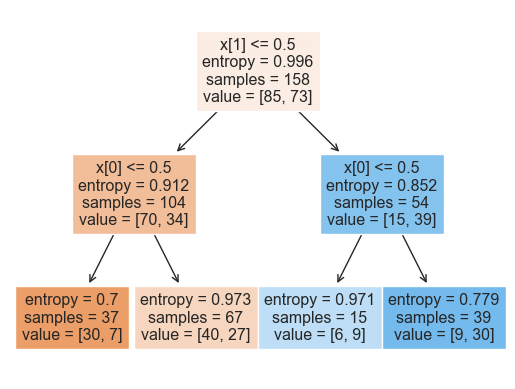

In [25]:
tree.plot_tree(dt, filled=True);

In [35]:
IG = 0.996 - (157*0.903 + 81*0.826)/(157+81)

IG

0.11920588235294105

In [31]:
l_node = dt.tree_.children_left[0] # индекс корня левого поддерева
n1 = dt.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
e1 = dt.tree_.impurity[l_node] # энтропия в корне левого поддерева

l_node = dt.tree_.children_right[0] # индекс корня левого поддерева
n2 = dt.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
e2 = dt.tree_.impurity[l_node] # энтропия в корне левого поддерева


In [34]:
IG = 0.996 - (n1*e1 + n2*e2)/(n1+n2)
IG

0.10453124971464411

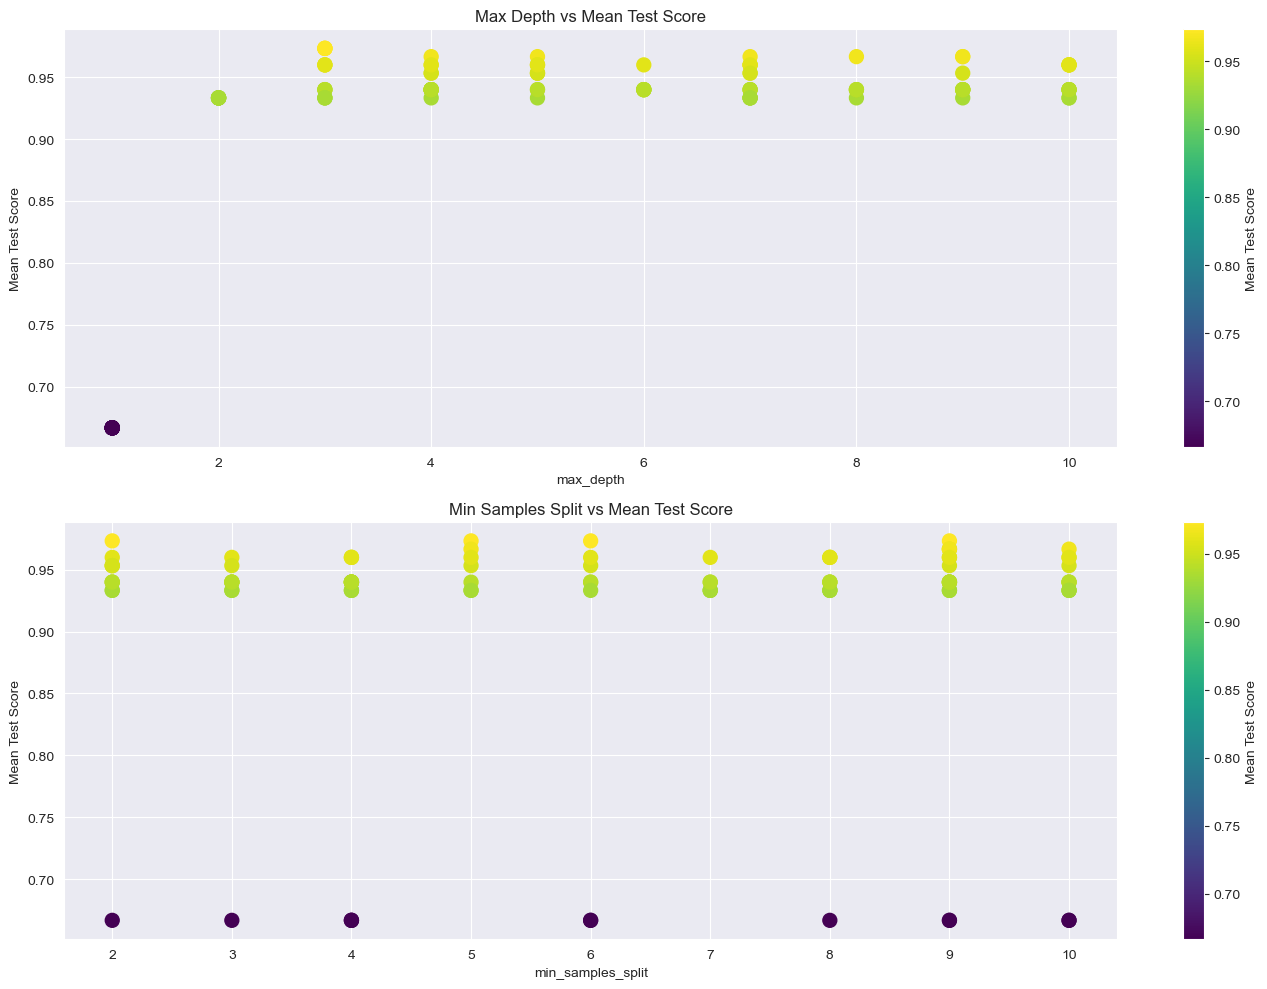

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns

# Загрузка данных
data = load_iris()
X = data.data
y = data.target

# Инициализация модели
clf = DecisionTreeClassifier(random_state=42)

# Определение распределения гиперпараметров
param_dist = {
    'max_depth': randint(1, 11),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11)
}

# Инициализация RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Поиск по случайным параметрам
random_search.fit(X, y)

# Сбор результатов поиска
results = random_search.cv_results_

# Извлечение данных для визуализации
mean_test_scores = results['mean_test_score']
param_max_depth = results['param_max_depth'].data
param_min_samples_split = results['param_min_samples_split'].data
param_min_samples_leaf = results['param_min_samples_leaf'].data

# Визуализация
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.scatter(param_max_depth, mean_test_scores, c=mean_test_scores, cmap='viridis', s=100)
plt.colorbar(label='Mean Test Score')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.title('Max Depth vs Mean Test Score')

plt.subplot(2, 1, 2)
plt.scatter(param_min_samples_split, mean_test_scores, c=mean_test_scores, cmap='viridis', s=100)
plt.colorbar(label='Mean Test Score')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Test Score')
plt.title('Min Samples Split vs Mean Test Score')

plt.tight_layout()
plt.show()

In [38]:
clf = DecisionTreeClassifier(criterion='')
clf

DecisionTreeClassifier()

In [39]:
?? DecisionTreeClassifier


In [40]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/events_data_test.csv')
submission_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submission_data_test.csv')
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
events_data['day'] = events_data.date.dt.date

submission_data['date'] = pd.to_datetime(submission_data.timestamp, unit = 's')
submission_data['day'] = submission_data.date.dt.date

users_data = events_data.groupby('user_id', as_index= False)\
        .agg({'timestamp': 'max'})\
        .rename({'timestamp':'last_timestamp'}, axis = 'columns')
now = 1526772811
drop_out_threasold = 2592000

users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threasold
users_scores = submission_data.pivot_table(index='user_id',\
                        columns = 'submission_status',\
                        values = 'step_id',\
                        aggfunc = 'count',\
                        fill_value = 0)\
                        .reset_index()
users_data = users_data.merge(users_scores, on = 'user_id', how = 'outer')
users_data = users_data.fillna(0)
users_invent_data = events_data.pivot_table(index = 'user_id',
                        columns = 'action',
                        values  = 'step_id',
                        aggfunc = 'count',
                        fill_value = 0).reset_index()
users_data = users_data.merge(users_invent_data, how = 'outer')
users_days = events_data.groupby('user_id').day.nunique()
users_days.to_frame().reset_index()
users_data = users_data.merge(users_days, on = 'user_id', how = 'outer')
users_data['passed_corse'] = users_data.passed > 170

In [41]:
users_data.head()

user_id  last_timestamp  is_gone_user  correct  wrong  discovered  passed  \
0        4      1529331707         False      0.0    0.0           1       1   
1        6      1546889407         False      0.0    0.0           1       1   
2       10      1534593770         False      0.0    0.0           2       2   
3       12      1537348641         False      1.0    0.0          11       9   
4       13      1533162170         False     29.0   36.0          70      70   

   started_attempt  viewed  day  passed_corse  
0                0       1    1         False  
1                0       1    1         False  
2                0       6    1         False  
3                4      14    1         False  
4               35     105    2         False

In [47]:
events_data.head()

step_id   timestamp      action  user_id                date         day
0    30456  1526893787      viewed    24417 2018-05-21 09:09:47  2018-05-21
1    30456  1526893797      viewed    24417 2018-05-21 09:09:57  2018-05-21
2    30456  1526893954      viewed    24417 2018-05-21 09:12:34  2018-05-21
3    30456  1526895780      viewed    24417 2018-05-21 09:43:00  2018-05-21
4    30456  1526893787  discovered    24417 2018-05-21 09:09:47  2018-05-21

In [51]:
user_min_time = events_data.groupby('user_id', as_index= False).agg({'timestamp' : 'min'}).raname({'tamestamp' : 'min_tamestamp'}, axis = 1)

AttributeError: 'DataFrame' object has no attribute 'raname'

In [52]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')
data[data.submission_status == "wrong"].groupby(['user_id', 'step_id'], as_index=False).agg({'timestamp':'max'}).step_id.value_counts().keys()[0]

31978

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split



titanic_train = pd.read_csv('path')

X = titanic_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_train.Survived

X = pd.get_dummies(X) # разбиваем колонки на несколько

X = X.fillna({'Age': X.Age.median()}) # заполняем пропуски

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_depth=3,
                                  min_samples_split=100,
                                  min_samples_leaf=10)

clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=list(X))

[Text(0.5, 0.875, 'Sex_male <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(0.3, 0.625, 'Pclass <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]'),
 Text(0.2, 0.375, 'Fare <= 149.035\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]'),
 Text(0.1, 0.125, 'entropy = 0.149\nsamples = 94\nvalue = [2, 92]'),
 Text(0.3, 0.125, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(0.4, 0.375, 'entropy = 0.996\nsamples = 99\nvalue = [53, 46]'),
 Text(0.7, 0.625, 'Age <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]'),
 Text(0.6, 0.375, 'entropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(0.8, 0.375, 'Fare <= 52.277\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]'),
 Text(0.7, 0.125, 'entropy = 0.58\nsamples = 332\nvalue = [286, 46]'),
 Text(0.9, 0.125, 'entropy = 0.956\nsamples = 45\nvalue = [28, 17]')]

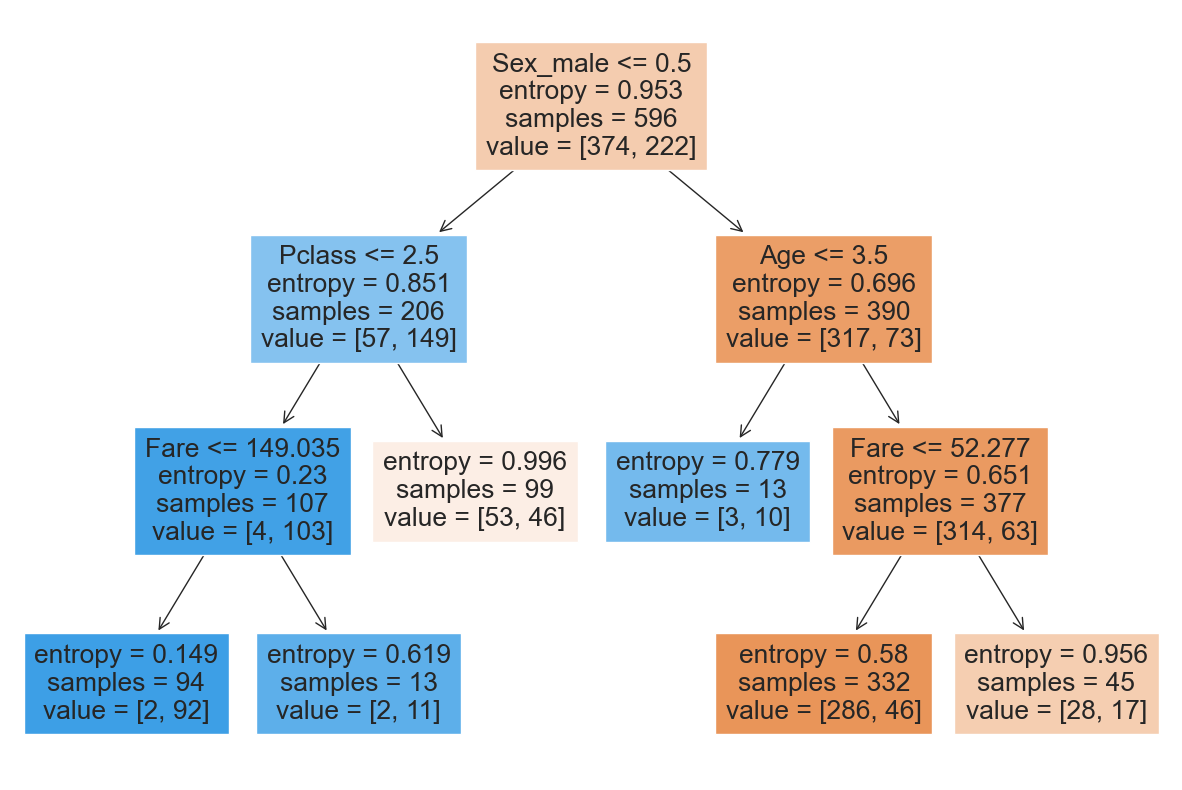

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split



titanic_train = pd.read_csv('/Users/glebpankeev/Downloads/titanic.csv')

X = titanic_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_train.Survived

X = pd.get_dummies(X) # разбиваем колонки на несколько

X = X.fillna({'Age': X.Age.median()}) # заполняем пропуски

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_depth=3,
                                  min_samples_split=100,
                                  min_samples_leaf=10)

clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=list(X))

In [1]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

NameError: name 'GridSearchCV' is not defined

In [ ]:
feature_importances_df = pd.DataFrame({'features':list(X_train.columns), 
                                       'feature_importances':  best_clf.feature_importances_})\
                        .sort_values(by='feature_importances')

feature_importances_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));

In [9]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv"

titanic_train = pd.read_csv(url)
titanic_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [10]:
list(titanic_train)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [11]:
X = titanic_train.drop(['target'], axis=1)
y = titanic_train.target


In [12]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)


In [13]:


rf.fit(X, y)


RandomForestClassifier(max_depth=5, n_estimators=10)

<Axes: >

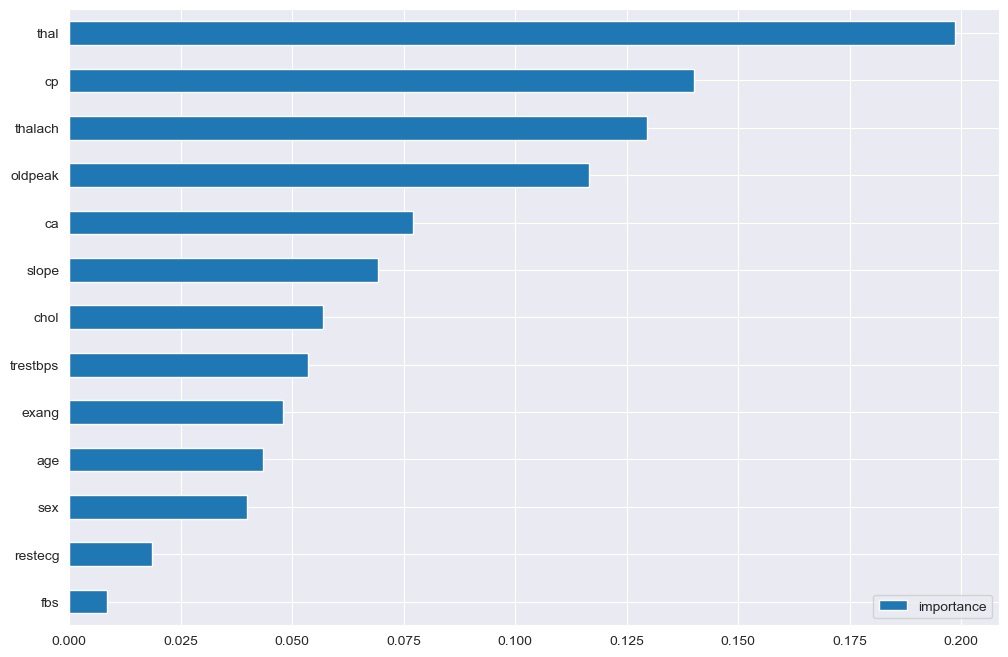

In [14]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [29]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

url = "/Users/glebpankeev/Downloads/training_mush.csv"
url1 = "/Users/glebpankeev/Downloads/testing_mush.csv"


titanic_train = pd.read_csv(url)
titanic_train

test_train = pd.read_csv(url1)
test_train

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             0            3          8        1     3                1   
1             5            3          4        1     5                1   
2             3            3          4        0     8                1   
3             3            2          2        0     7                1   
4             3            2          2        0     8                1   
...         ...          ...        ...      ...   ...              ...   
2026          3            3          2        0     2                1   
2027          5            2          8        1     0                1   
2028          5            3          3        0     2                1   
2029          5            3          3        1     5                1   
2030          5            3          3        0     2                1   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0          0           4            0  ...   
1                0          0          10            1  ...   
2                0          1           0            1  ...   
3                0          1           0            1  ...   
4                0          1           0            1  ...   
...            ...        ...         ...          ...  ...   
2026             0          1           0            1  ...   
2027             0          0          10            0  ...   
2028             0          0           3            0  ...   
2029             0          0           9            1  ...   
2030             0          0           7            0  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                            2                       7   
1                            2                       6   
2                            2                       7   
3                            1                       6   
4                            1                       6   
...                        ...                     ...   
2026                         1                       7   
2027                         2                       7   
2028                         1                       6   
2029                         2                       3   
2030                         1                       0   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                          7          0           2            1          4   
1                          6          0           2            1          4   
2                          6          0           2            1          0   
3                          7          0           2            1          0   
4                          6          0           2            1          0   
...                      ...        ...         ...          ...        ...   
2026                       7          0           2            1          0   
2027                       7          0           2            1          4   
2028                       0          0           2            1          2   
2029                       3          0           2            1          4   
2030                       0          0           2            1          2   

      spore-print-color  population  habitat  
0                     2           3        3  
1                     3           5        0  
2                     7           4        4  
3                     7           4        0  
4                     7           4        4  
...                 ...         ...      ...  
2026                  7           4        2  
2027                  2           2        1  
2028                  1           4        4  
2029                  3           4        0  
2030                  1           4        4  

[2031 rows x 22 columns]

In [16]:
list(titanic_train)

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat',
 'class']

In [33]:
X = titanic_train.drop(['class'], axis=1)
y = titanic_train.drop(['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat'], axis=1)


X_test = test_train[['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']]
X_test

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             0            3          8        1     3                1   
1             5            3          4        1     5                1   
2             3            3          4        0     8                1   
3             3            2          2        0     7                1   
4             3            2          2        0     8                1   
...         ...          ...        ...      ...   ...              ...   
2026          3            3          2        0     2                1   
2027          5            2          8        1     0                1   
2028          5            3          3        0     2                1   
2029          5            3          3        1     5                1   
2030          5            3          3        0     2                1   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0          0           4            0  ...   
1                0          0          10            1  ...   
2                0          1           0            1  ...   
3                0          1           0            1  ...   
4                0          1           0            1  ...   
...            ...        ...         ...          ...  ...   
2026             0          1           0            1  ...   
2027             0          0          10            0  ...   
2028             0          0           3            0  ...   
2029             0          0           9            1  ...   
2030             0          0           7            0  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                            2                       7   
1                            2                       6   
2                            2                       7   
3                            1                       6   
4                            1                       6   
...                        ...                     ...   
2026                         1                       7   
2027                         2                       7   
2028                         1                       6   
2029                         2                       3   
2030                         1                       0   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                          7          0           2            1          4   
1                          6          0           2            1          4   
2                          6          0           2            1          0   
3                          7          0           2            1          0   
4                          6          0           2            1          0   
...                      ...        ...         ...          ...        ...   
2026                       7          0           2            1          0   
2027                       7          0           2            1          4   
2028                       0          0           2            1          2   
2029                       3          0           2            1          4   
2030                       0          0           2            1          2   

      spore-print-color  population  habitat  
0                     2           3        3  
1                     3           5        0  
2                     7           4        4  
3                     7           4        0  
4                     7           4        4  
...                 ...         ...      ...  
2026                  7           4        2  
2027                  2           2        1  
2028                  1           4        4  
2029                  3           4        0  
2030                  1           4        4  

[2031 rows x 22 columns]

In [34]:


rf = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators': range(10,50,10), 'max_depth': range(1,12,2), 'min_samples_leaf' :range(1,7),
'min_samples_split' : range(2,9,2)}
grid_search_cv_clf = GridSearchCV(rf, parametrs, cv=3, n_jobs=-1, )
grid_search_cv_clf.fit(X, y)
grid_search_cv_clf.best_params_


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector 

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [61]:
rf.fit(X, y)
y_pred\
    = rf.predict(X_test)
arr= np.array(arr)


count_of_ones = np.sum(arr == 1)  # Суммируем булевы значения, где arr равно 1
print(count_of_ones)
arr

ValueError: at least one array or dtype is required

In [26]:
rf.fit(X, y)

/var/folders/kd/15grz0v55ds97f9bw7zry13c0000gn/T/ipykernel_48306/1315340738.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


RandomForestClassifier(random_state=0)

<Axes: >

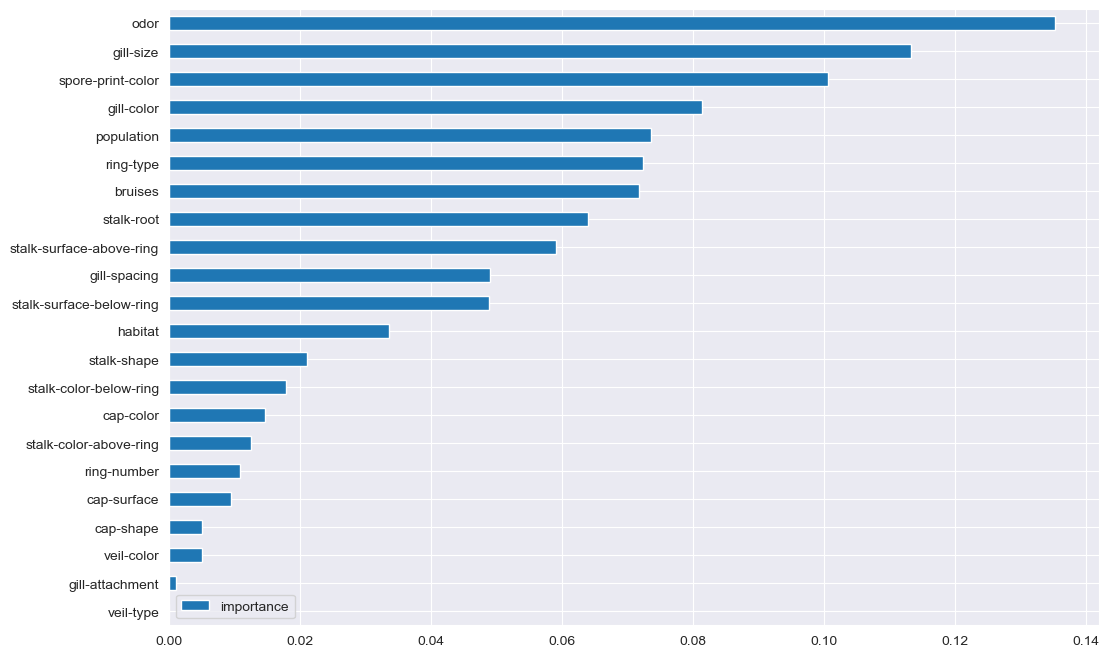

In [27]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))



In [51]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [6093, 2031]

In [71]:



url1 = "/Users/glebpankeev/Desktop/testing_y_mush.csv"



test_train = pd.read_csv(url1)
test_train

class
0         0
1         0
2         1
3         1
4         1
...     ...
2026      1
2027      0
2028      1
2029      0
2030      1

[2031 rows x 1 columns]

In [72]:
y = test_train


y1 = pd.DataFrame(y_pred)
type(y)


pandas.core.frame.DataFrame

In [65]:
?? confusion_matrix

<Axes: >

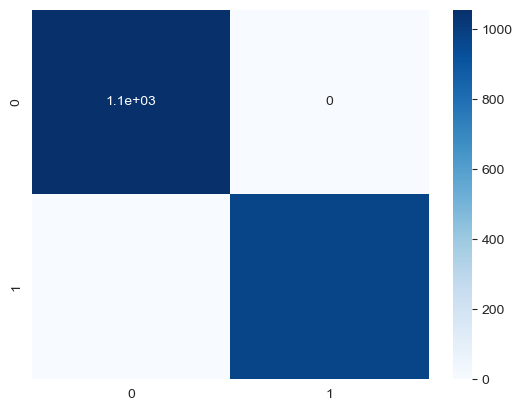

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues")

In [75]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X, y, cmap=plt.cm.Blues, values_format='.2g')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

In [ ]:
rf.fit(X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': range(10,50,10), 'max_depth': range(1,12,2), 'min_samples_leaf' :range(1,7),
'min_samples_split' : range(2,9,2)}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5, n_jobs=-1)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

In [83]:

url = "/Users/glebpankeev/Downloads/invasion.csv"
url1 = "/Users/glebpankeev/Downloads/operative_information.csv"


titanic_train = pd.read_csv(url)
titanic_train

test_train = pd.read_csv(url1)
titanic_train

class  g_reflection  i_reflection       speed  brightness  \
0    transport      2.190672      6.716633   62.168208    0.347465   
1    transport      3.453276      8.995909   62.994707    0.590094   
2    transport      2.432994      6.938691   62.245807    0.329288   
3      fighter      6.083763      3.019459   18.474555    0.174738   
4      fighter     12.876769      2.452950  195.805771    0.150446   
..         ...           ...           ...         ...         ...   
495    fighter      9.901731      7.162124   58.095069    0.145065   
496  transport      3.574132      7.118835   62.928159    0.469670   
497    fighter      9.186049      4.580781  412.102112    0.108195   
498    fighter      8.278256      8.353756  268.121561    0.132661   
499  transport      0.860820      8.014988   62.292486    0.304896   

     time_of_observance     volume  
0                158221  44.932446  
1                385972  41.568300  
2                446482  40.123467  
3                210125  11.384865  
4                 23109  11.328806  
..                  ...        ...  
495              395762  12.901909  
496              435926  39.926551  
497              299594  12.178203  
498              361911  13.905809  
499              364601  46.151972  

[500 rows x 7 columns]

In [84]:
test_train


g_reflection  i_reflection       speed  brightness  time_of_observance  \
0         7.516543      3.916691  513.954279    0.177247              105908   
1         4.322988      6.967689   63.752970    0.545922              277855   
2         4.595724      9.098297   62.233948    0.389201              160662   
3         2.689675      7.964869   62.475495    0.541081              162092   
4         8.075576      5.169719  336.441261    0.174757              466853   
...            ...           ...         ...         ...                 ...   
1495     11.755466      5.583147  325.069957    0.170644              388400   
1496     12.220137      4.023177  439.975574    0.163958              195305   
1497      1.611053      7.864930   65.025106    0.430021              307856   
1498      7.114131      5.532188  391.178342    0.150117               51590   
1499      3.804275      8.038047   62.345396    0.564630               97284   

         volume  
0     13.267224  
1     39.833130  
2     42.014556  
3     42.056829  
4     11.779813  
...         ...  
1495  13.210917  
1496  13.819358  
1497  47.369083  
1498  12.447761  
1499  44.671211  

[1500 rows x 6 columns]

In [80]:
list(titanic_train)

['class',
 'g_reflection',
 'i_reflection',
 'speed',
 'brightness',
 'time_of_observance',
 'volume']

In [85]:
X = titanic_train.drop(['class'], axis=1)
y = titanic_train.drop(['g_reflection',
 'i_reflection',
 'speed',
 'brightness',
 'time_of_observance',
 'volume'], axis=1)


X_test = test_train
X_test

g_reflection  i_reflection       speed  brightness  time_of_observance  \
0         7.516543      3.916691  513.954279    0.177247              105908   
1         4.322988      6.967689   63.752970    0.545922              277855   
2         4.595724      9.098297   62.233948    0.389201              160662   
3         2.689675      7.964869   62.475495    0.541081              162092   
4         8.075576      5.169719  336.441261    0.174757              466853   
...            ...           ...         ...         ...                 ...   
1495     11.755466      5.583147  325.069957    0.170644              388400   
1496     12.220137      4.023177  439.975574    0.163958              195305   
1497      1.611053      7.864930   65.025106    0.430021              307856   
1498      7.114131      5.532188  391.178342    0.150117               51590   
1499      3.804275      8.038047   62.345396    0.564630               97284   

         volume  
0     13.267224  
1     39.833130  
2     42.014556  
3     42.056829  
4     11.779813  
...         ...  
1495  13.210917  
1496  13.819358  
1497  47.369083  
1498  12.447761  
1499  44.671211  

[1500 rows x 6 columns]

In [86]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': range(10,50,10), 'max_depth': range(1,12,2), 'min_samples_leaf' :range(1,7),
'min_samples_split' : range(2,9,2)}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5, n_jobs=-1)
grid_search_cv_clf.fit(X, y)
best_clf = grid_search_cv_clf.best_estimator_


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector 

In [89]:
y_pred = best_clf.predict(X_test)

In [90]:

arr = np.array(y_pred)


count_of_ones1 = np.sum(arr == 'fighter')
count_of_ones2 = np.sum(arr == 'transport')  
count_of_ones3 = np.sum(arr == 'cruiser')  
# Суммируем булевы значения, где arr равно 1
print(count_of_ones1, count_of_ones2, 
count_of_ones3)


675 595 230


<Axes: >

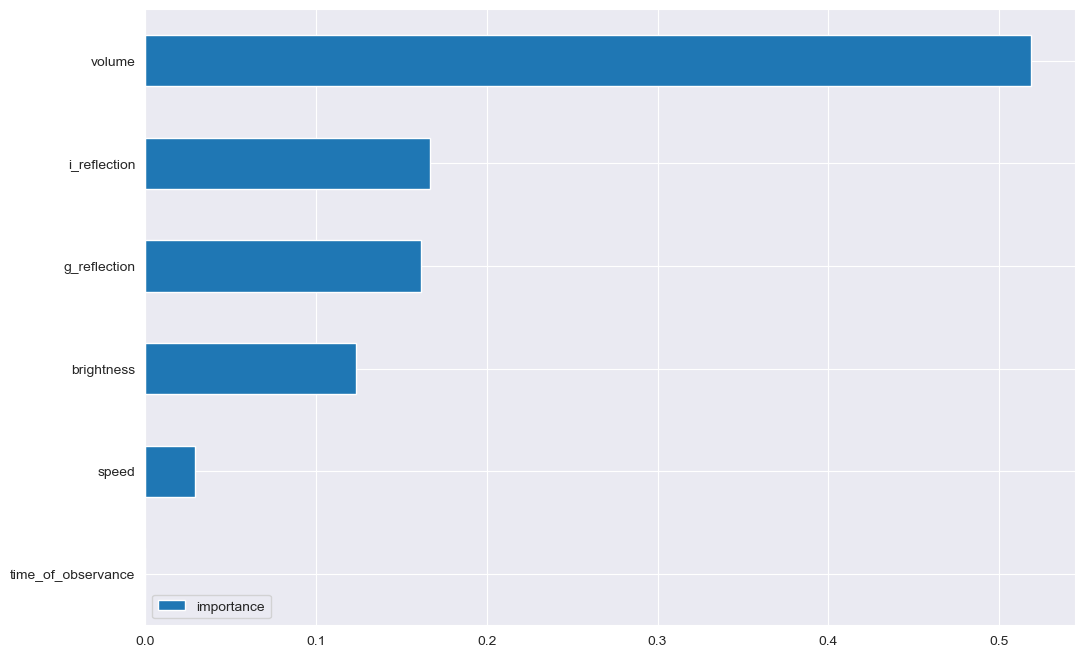

In [93]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))


In [94]:

url = "/Users/glebpankeev/Downloads/space_can_be_a_dangerous_place.csv"
url1 = "/Users/glebpankeev/Downloads/operative_information.csv"


titanic_train = pd.read_csv(url)
titanic_train

test_train = pd.read_csv(url1)
titanic_train

r    phi  peradventure_index  dustiness  black_hole_is_near  \
0      169.1  138.0             22.3212   0.706285                   0   
1       11.1  148.0              1.4652  -0.410512                   1   
2      274.6  201.0             36.2472   0.756457                   1   
3      172.8  173.0             22.8096   0.035221                   1   
4      223.3  222.0             29.4756   0.197271                   0   
...      ...    ...                 ...        ...                 ...   
99995  301.7  249.0             39.8244   0.397064                   0   
99996  194.0  350.0             25.6080  -1.062202                   0   
99997  201.4  112.0             26.5848   1.571040                   0   
99998    7.8  115.0              1.0296  -1.206575                   0   
99999  189.3  332.0             24.9876   0.932474                   0   

       buggers_were_noticed  nearby_system_has_planemo  dangerous  
0                         1                          1          1  
1                         1                          1          1  
2                         1                          1          1  
3                         1                          1          1  
4                         1                          1          1  
...                     ...                        ...        ...  
99995                     1                          1          1  
99996                     1                          1          1  
99997                     1                          1          1  
99998                     1                          1          1  
99999                     1                          1          1  

[100000 rows x 8 columns]

NameError: name 'plt' is not defined

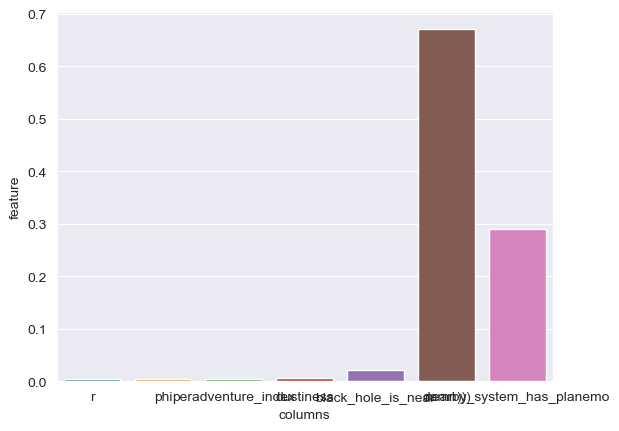

In [96]:
from sklearn.model_selection import train_test_split

a=pd.read_csv("/Users/glebpankeev/Downloads/space_can_be_a_dangerous_place.csv").rename(columns={'buggers_were_noticed':'damn)))'})


X=a.iloc[:,:-1]
y=a.iloc[:,-1]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


iris=RandomForestClassifier(n_estimators=5,max_depth=5)
iris.fit(X_train,y_train)
predict=iris.predict(X_test)

s=iris.feature_importances_

l=pd.DataFrame({'columns':X.columns.values,'feature':s})
sns.barplot(data=l,x='columns',y='feature')
plt.show()

<Axes: >

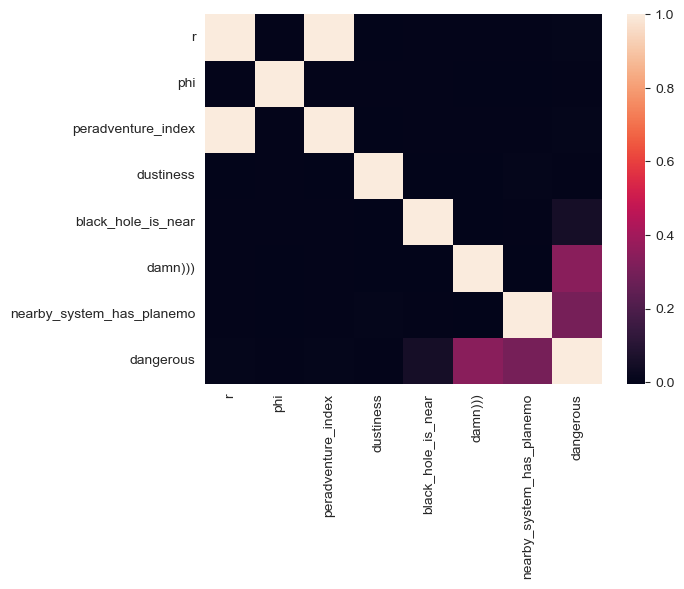

In [97]:
import seaborn as sns

corr = a.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Присутствие жукеров в системе - buggers_were_noticed
Близость к чёрной дыре - black_hole_is_near
Наличие планемо - nearby_system_has_planemo

<Axes: ylabel='features'>

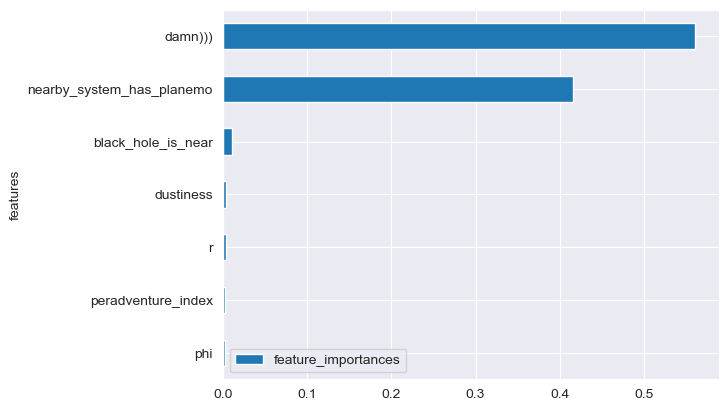

In [102]:
X = a.drop(['dangerous'], axis = 1)
y = a['dangerous']

np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)
rf.fit(X, y)

imp = pd.DataFrame({'features':list(X), 'feature_importances': rf.feature_importances_})
imp.sort_values('feature_importances', ascending=True).plot.barh(x='features')

In [103]:
df = pd.DataFrame(range(10000000))

%time df.apply(np.mean)

%time df.apply('mean')

%time df.describe().loc['mean']

%time df.mean(axis=0)

CPU times: user 12.5 ms, sys: 11.3 ms, total: 23.8 ms
Wall time: 38.5 ms
CPU times: user 4.36 ms, sys: 1.06 ms, total: 5.43 ms
Wall time: 7.06 ms
CPU times: user 87.7 ms, sys: 36.3 ms, total: 124 ms
Wall time: 165 ms
CPU times: user 3.61 ms, sys: 63 µs, total: 3.67 ms
Wall time: 3.85 ms


0    4999999.5
dtype: float64

Курсы:

Курс по Data Science от UCSD - это линейка из 4-ёх курсов, затрагивающая DS вообще, теорию вероятностей, машинное обучение и работу с большими объёмами данных
Курс по линейной алгебре - теоретический курс по линалу, базовые знания которого нужны для нейронных сетей
Курс по ML раз
Курс по ML два
Знаменитый курс по ML от Andrew Ng
Линейка курсов по Deep Learning от Andrew Ng
Курс от ODS
Ещё один крутой курс
Книги:

Книга по применению sklearn для ML
Книга по пандасу от его создателя
Книга с пандасовскими рецептами
Ещё книга о пандасе и ML
Теория

In [1]:
from scipy.misc import derivative

import math

def f(x):

    return 0.25*math.log1p((x**2 - 1)/(x**2 + 1))

derivative(f, 1, dx = 3)

/var/folders/kd/15grz0v55ds97f9bw7zry13c0000gn/T/ipykernel_41881/4010307738.py:9: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(f, 1, dx = 3)


0.00677162206240729

In [2]:
from math import log2

print((log2(8) + log2(18)) / (2 * log2(2) + log2(3)))

2.0


In [3]:
from math import log
print(log(20, 225) * log(15, 289) * log(17, 20))


0.25


In [4]:
from scipy.misc import derivative

import math

def f(x):

    return 0.25*math.log1p((x**2 - 1)/(x**2 + 1))

derivative(f, 1, dx = 3)

/var/folders/kd/15grz0v55ds97f9bw7zry13c0000gn/T/ipykernel_41881/4010307738.py:9: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(f, 1, dx = 3)


0.00677162206240729

In [6]:
import numpy as np

a = np.array([[1,0,0,0],
            [0,1,0,0],
            [0,0,1,0],
            [0,0,0,1]])
b = np.array([[1,2,3],
            [5,6,7],
            [9,10,11],
            [4,8,12]])
c = np.array([[3,0,0],
            [0,3,0],
            [0,0,3]])

matrix= ((2*a).dot(b)).dot(c)
print(matrix)

[[ 6 12 18]
 [30 36 42]
 [54 60 66]
 [24 48 72]]


In [30]:
import numpy
import pandas

X = np.array ([[1,60], [1,50], [1,75]])
y = np.array([[10],[7],[12]])


In [29]:



step1 = X.T.dot(X)
print (step1)
step2 = np.linalg.inv(step1)
print(step2)

step3 = step2.dot(X.T)
print(step3)
b = step3.dot(y)
print(b)

[[    3   185]
 [  185 11725]]
[[ 1.23421053e+01 -1.94736842e-01]
 [-1.94736842e-01  3.15789474e-03]]
[[ 0.65789474  2.60526316 -2.26315789]
 [-0.00526316 -0.03684211  0.04210526]]
[[-2.34210526]
 [ 0.19473684]]


In [37]:
df = pandas.read_csv('https://stepik.org/media/attachments/lesson/16462/boston_houses.csv',)
df

TypeError: read_csv() got an unexpected keyword argument 'index'

In [7]:
import numpy as np

In [11]:
a = np.array ([[1,2,3],[4,5,6]])
print(a)

[[1 2 3]
 [4 5 6]]


In [12]:
a.shape

(2, 3)

In [16]:
a = np.eye(3,M=3, k=-1)
print(a)

[[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [25]:
a = np.zeros(3)
print(a)

TypeError: zeros() got an unexpected keyword argument 'M'